# Очистка золота

## Постановка задачи

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:
1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Описание проекта

Данные находятся в трёх файлах:
- gold_recovery_train_new.csv — обучающая выборка;
- gold_recovery_test_new.csv — тестовая выборка;
- gold_recovery_full_new.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.

## Описание данных

### Технологический процесс
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
  
    - Xanthate **— ксантогенат (промотер, или активатор флотации);
    - Sulphate — сульфат (на данном производстве сульфид натрия);
    - Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота
### Параметры этапов
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

Формула эффективности обогащения:
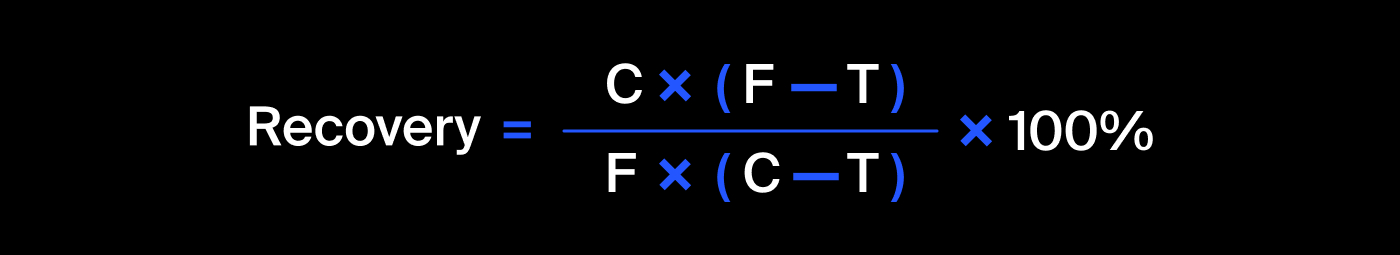
 
Формулы метрик качества:

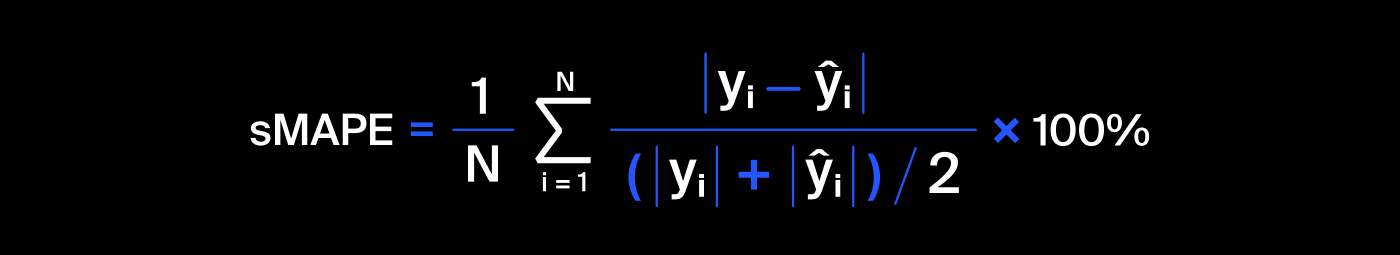

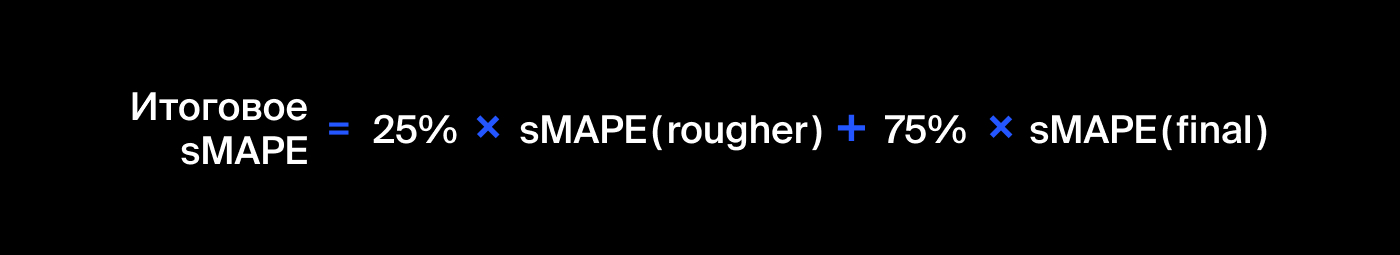

## Подготовка данных

### Подключение модулей

In [1]:
import pandas as pd
import os
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error

### Настройка pandas для отображения больших таблиц

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### Открытие файлов

In [3]:
path_1 = '/Users/ivanbodrenkov/Yandex.Disk.localized/Яндекс Практикум/9. Модуль 2 - Сборный проект/Проект/gold_recovery_train_new.csv'
path_2 = 'https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv'
path_3 = 'C:/Users/bodrenkov_ia/Desktop/Project/gold_recovery_train_new.csv'
path_4 = '/datasets/gold_recovery_train_new.csv'

if os.path.exists(path_1):
    gold_recovery_train_new = pd.read_csv(path_1, sep = ',')
elif os.path.exists(path_2):
    gold_recovery_train_new = pd.read_csv(path_2, sep = ',')
elif os.path.exists(path_3):
    gold_recovery_train_new = pd.read_csv(path_3, sep = ',')
elif os.path.exists(path_4):
    gold_recovery_train_new = pd.read_csv(path_4, sep = ',')
else:
    print('Что-то пошло не так!')

In [4]:
path_1 = '/Users/ivanbodrenkov/Yandex.Disk.localized/Яндекс Практикум/9. Модуль 2 - Сборный проект/Проект/gold_recovery_test_new.csv'
path_2 = 'https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv'
path_3 = 'C:/Users/bodrenkov_ia/Desktop/Project/gold_recovery_test_new.csv'
path_4 = '/datasets/gold_recovery_test_new.csv'

if os.path.exists(path_1):
    gold_recovery_test_new = pd.read_csv(path_1, sep = ',')
elif os.path.exists(path_2):
    gold_recovery_test_new = pd.read_csv(path_2, sep = ',')
elif os.path.exists(path_3):
    gold_recovery_test_new = pd.read_csv(path_3, sep = ',')
elif os.path.exists(path_4):
    gold_recovery_test_new = pd.read_csv(path_4, sep = ',')
else:
    print('Что-то пошло не так!')

In [5]:
path_1 = '/Users/ivanbodrenkov/Yandex.Disk.localized/Яндекс Практикум/9. Модуль 2 - Сборный проект/Проект/gold_recovery_full_new.csv'
path_2 = 'https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv'
path_3 = 'C:/Users/bodrenkov_ia/Desktop/Project/gold_recovery_full_new.csv'
path_4 = '/datasets/gold_recovery_full_new.csv'

if os.path.exists(path_1):
    gold_recovery_full_new = pd.read_csv(path_1, sep = ',')
elif os.path.exists(path_2):
    gold_recovery_full_new = pd.read_csv(path_2, sep = ',')
elif os.path.exists(path_3):
    gold_recovery_full_new = pd.read_csv(path_3, sep = ',')
elif os.path.exists(path_4):
    gold_recovery_full_new = pd.read_csv(path_4, sep = ',')
else:
    print('Что-то пошло не так!')

### Основная информация о данных

In [6]:
print(gold_recovery_train_new.info())
display(gold_recovery_train_new.head(3))
gold_recovery_train_new.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

In [7]:
print(gold_recovery_test_new.info())
display(gold_recovery_test_new.head(3))
gold_recovery_test_new.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

In [8]:
print(gold_recovery_full_new.info())
display(gold_recovery_full_new.head(3))
gold_recovery_full_new.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

### Построение гистограмм по "полному" датасету

In [9]:
def hist_maker(data):
    for column in data.columns[1:]:
        plt.hist(data[column], color = 'gray', bins = 20)
        plt.title(column)
        plt.show()


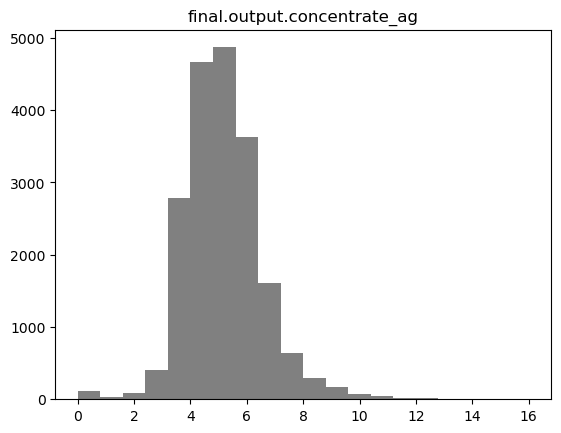

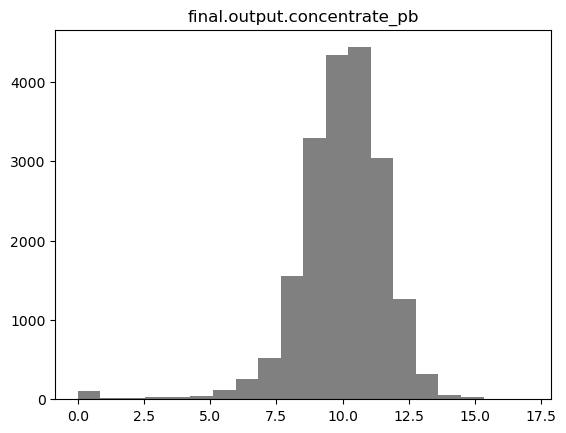

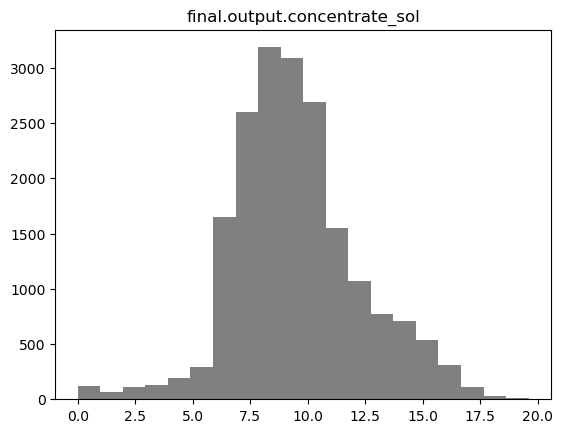

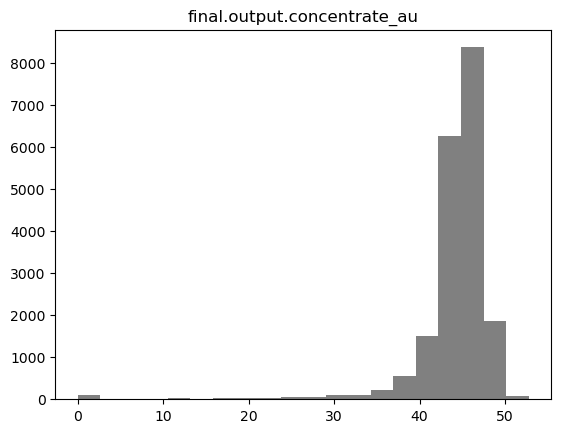

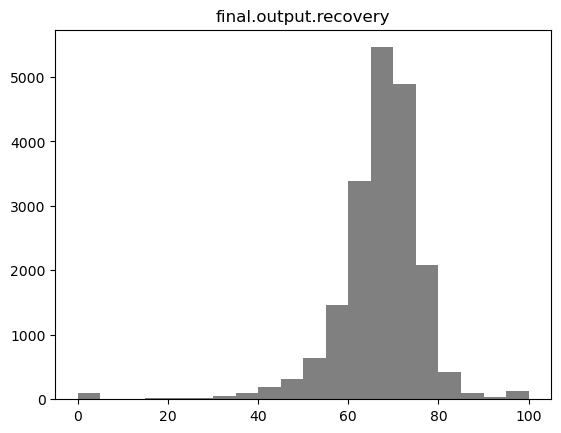

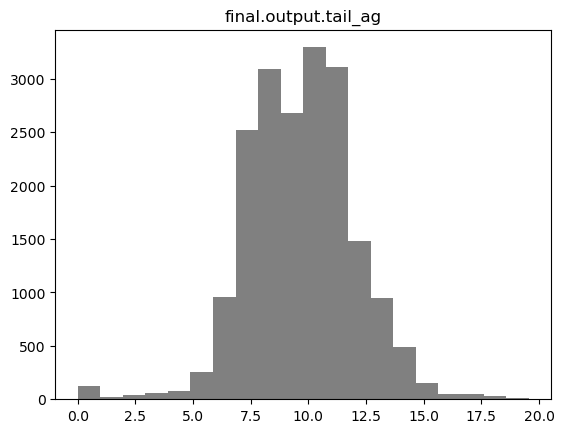

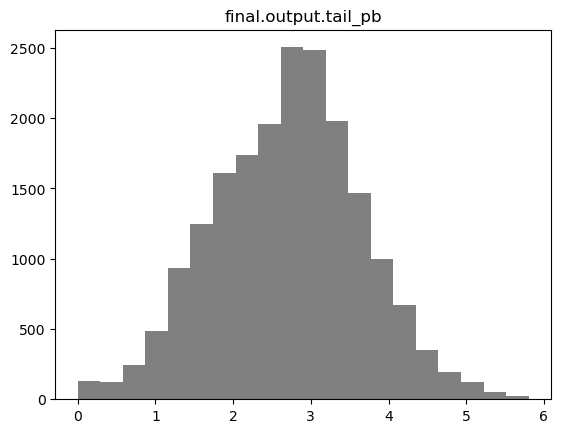

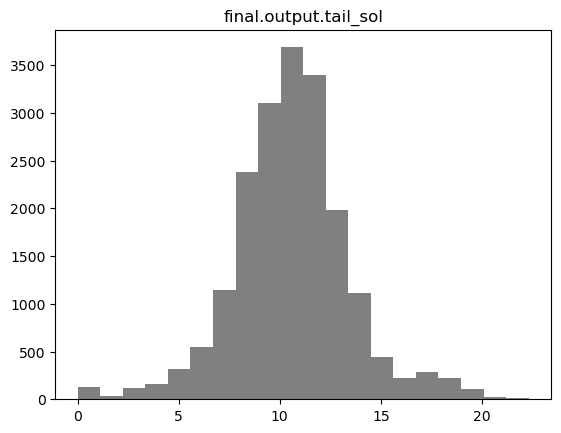

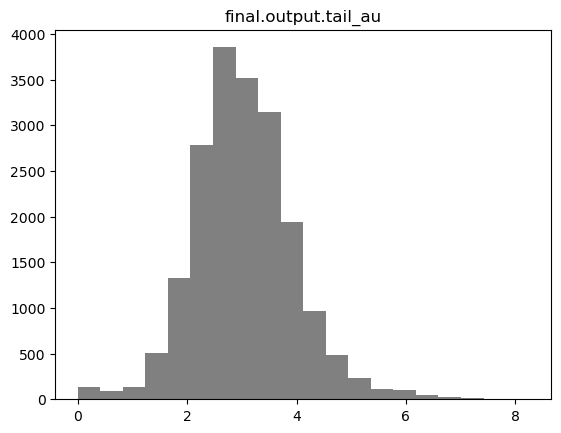

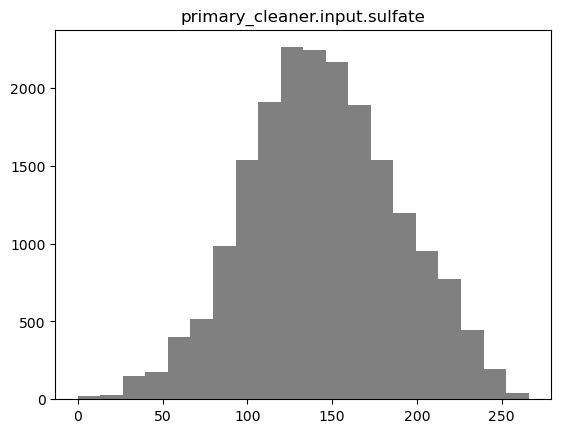

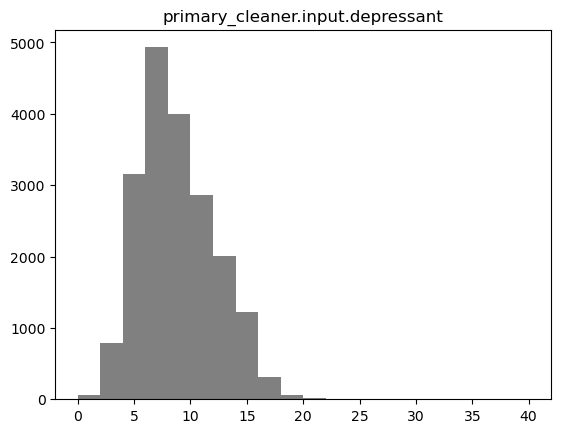

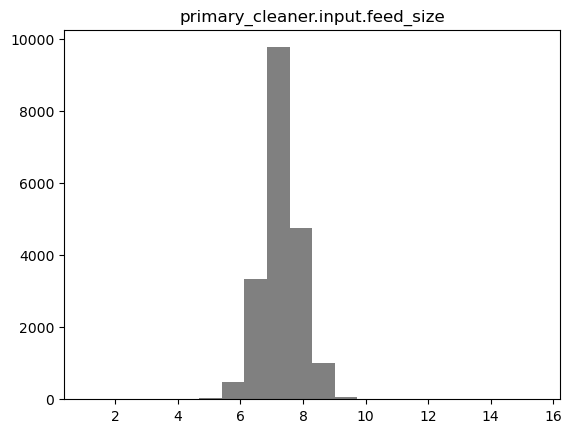

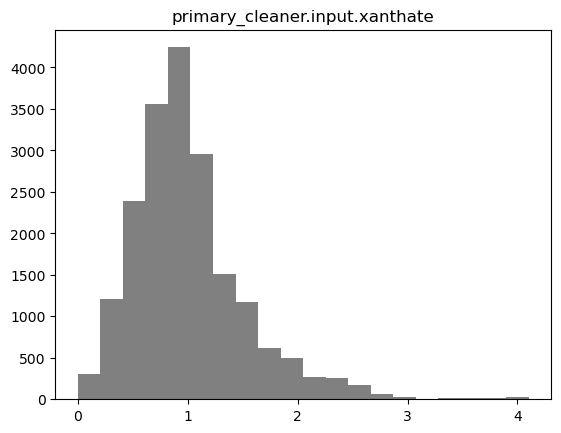

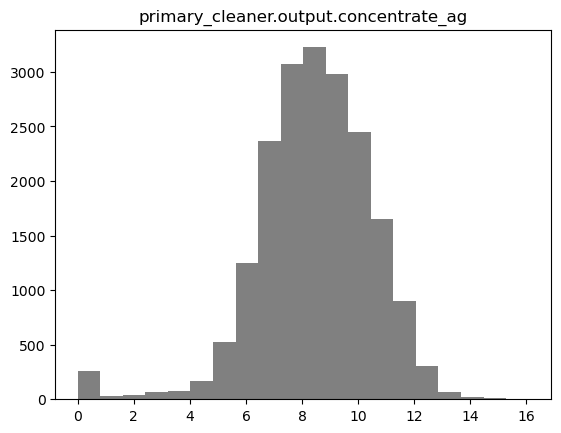

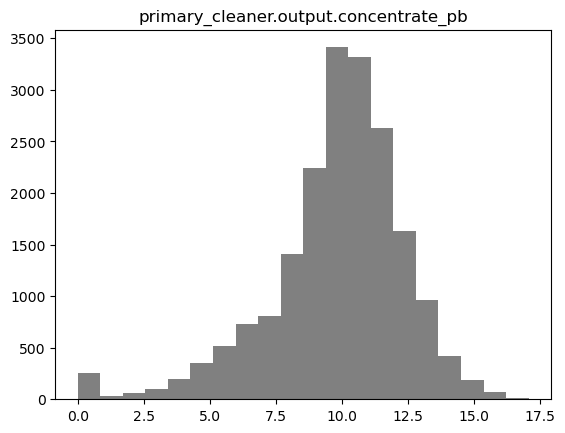

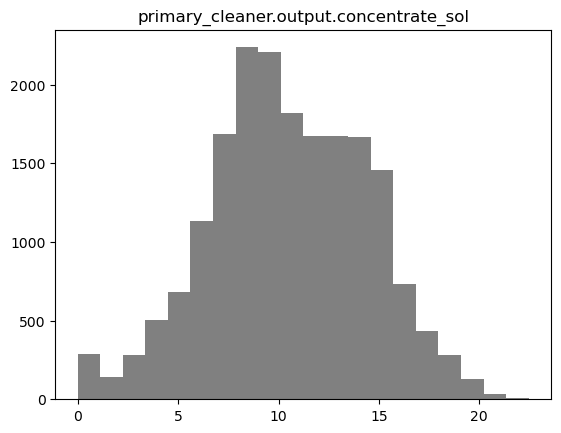

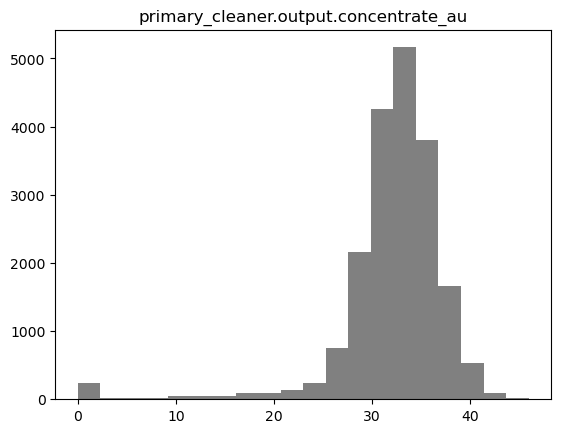

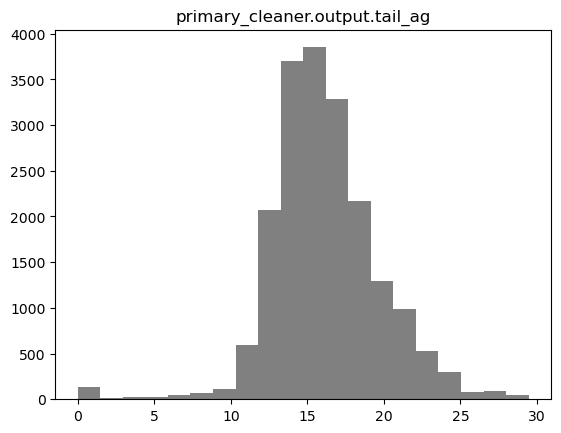

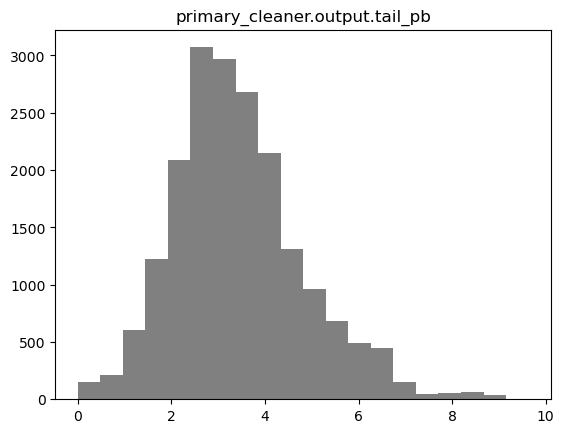

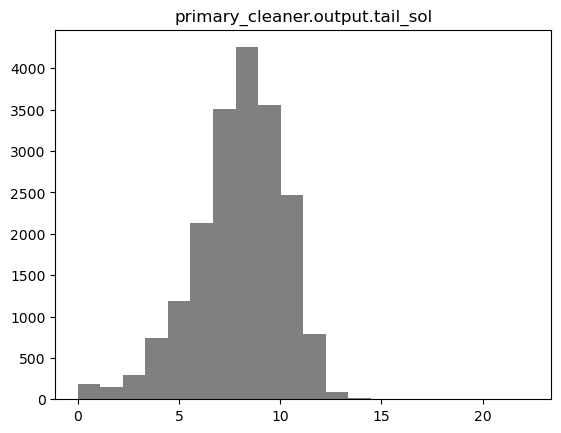

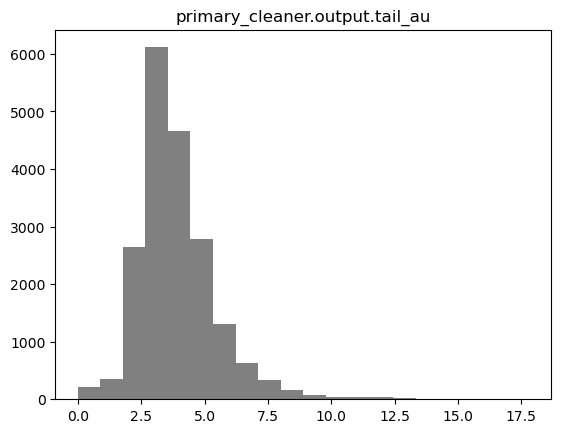

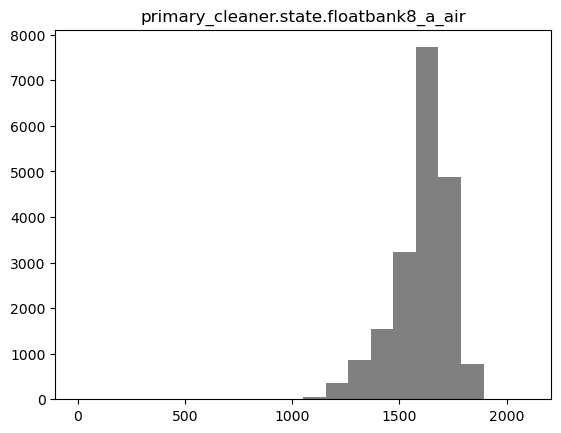

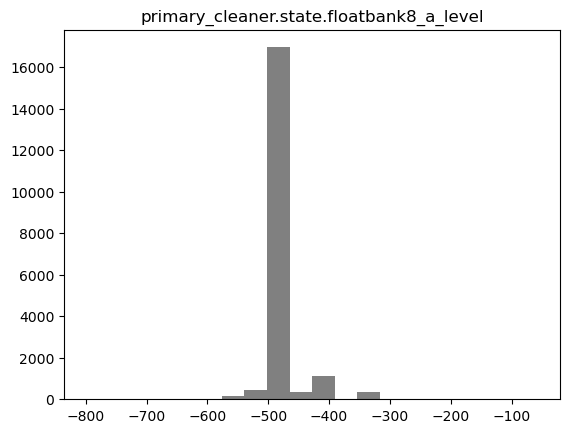

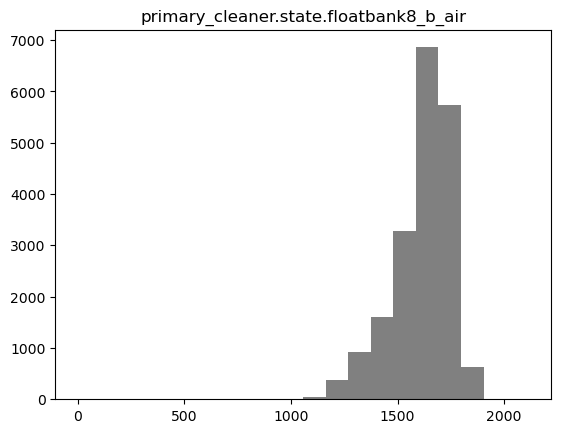

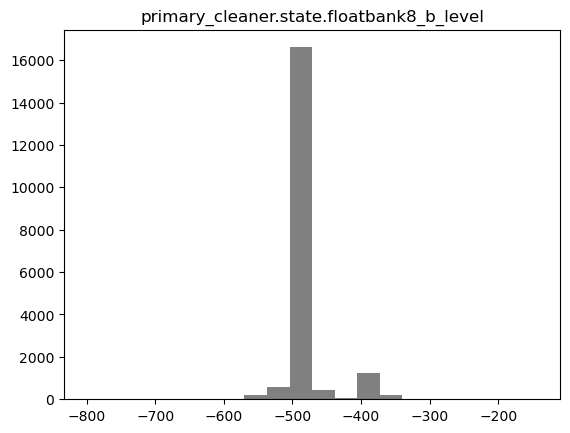

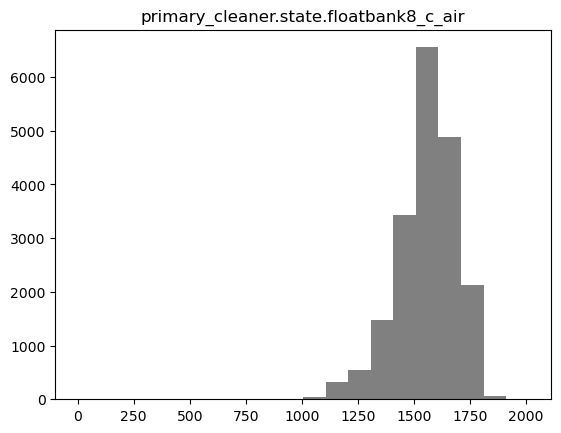

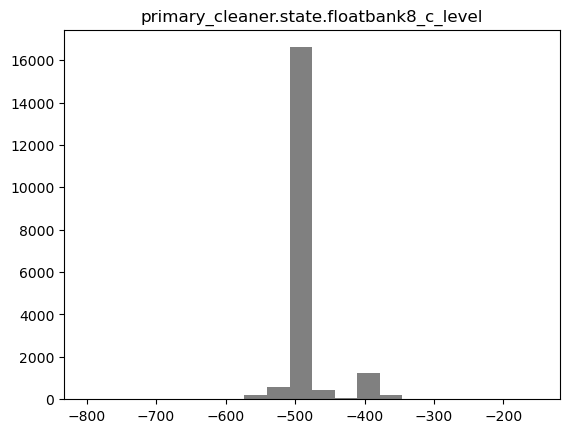

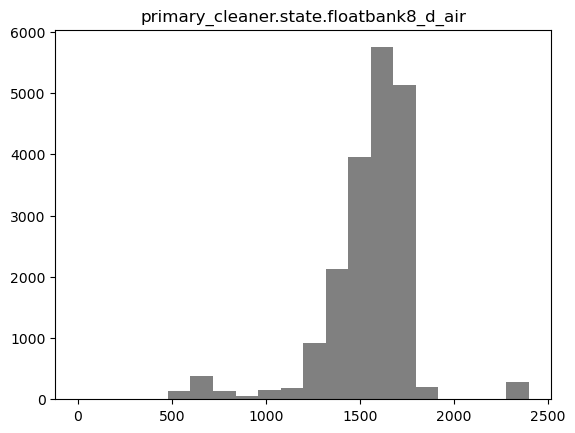

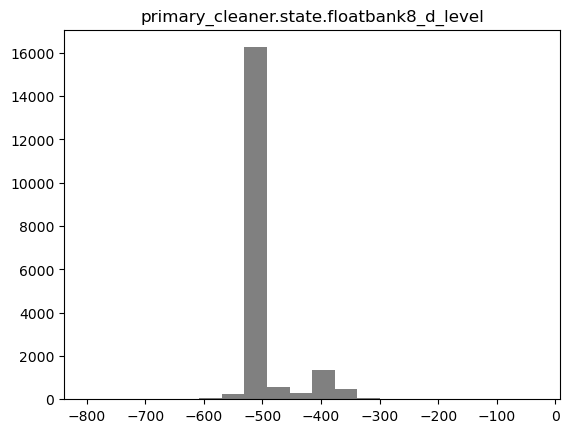

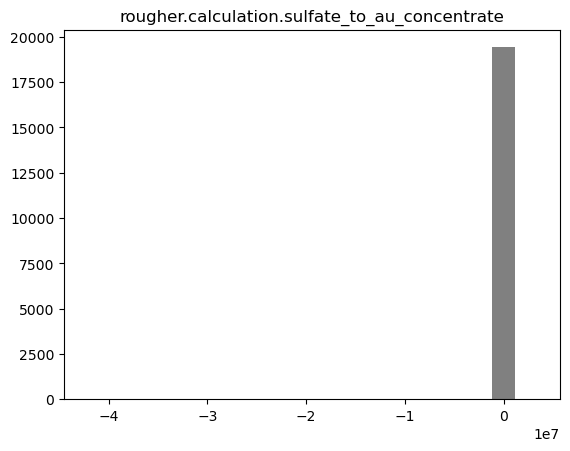

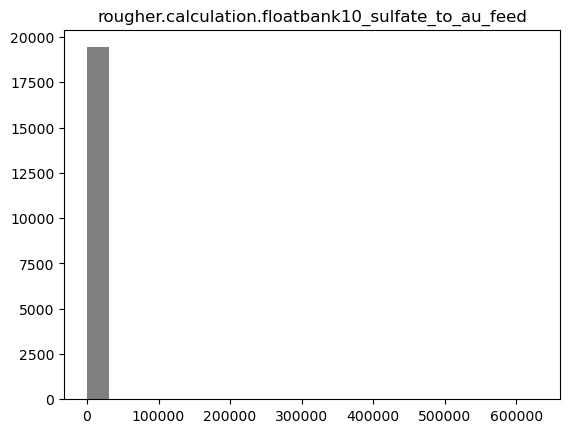

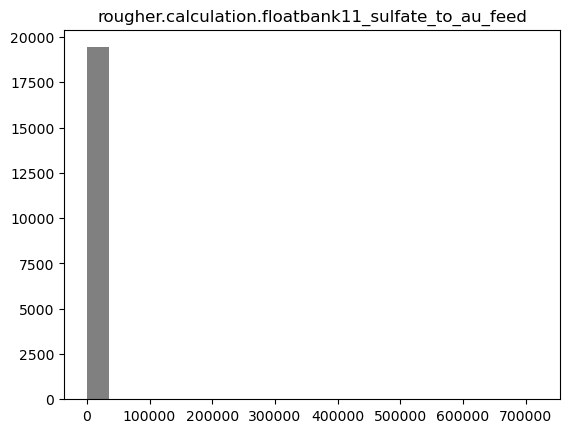

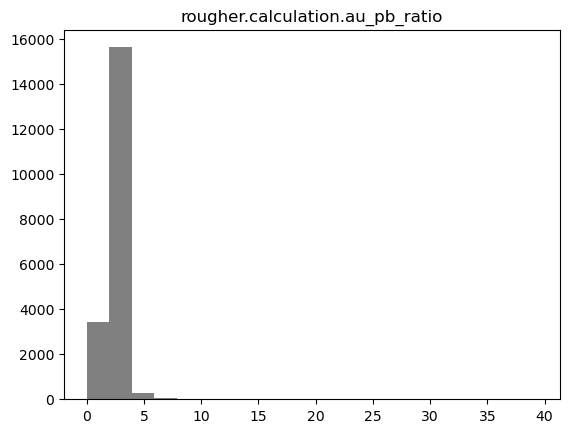

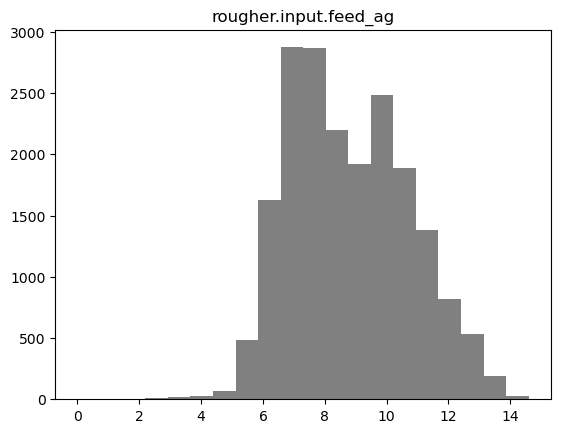

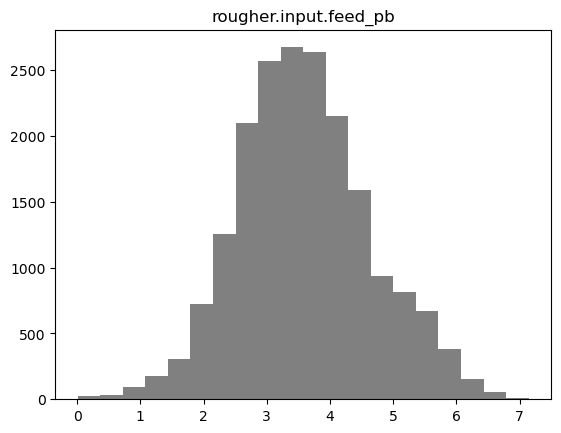

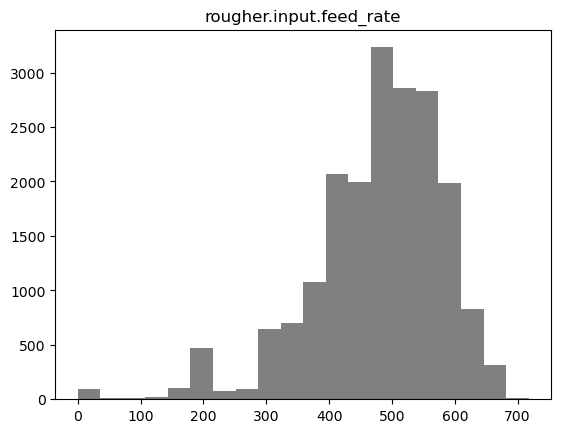

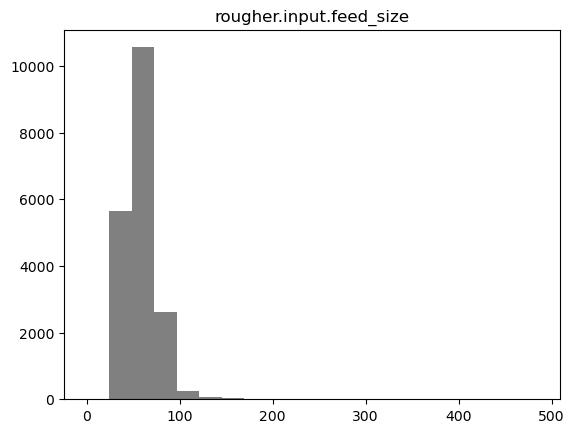

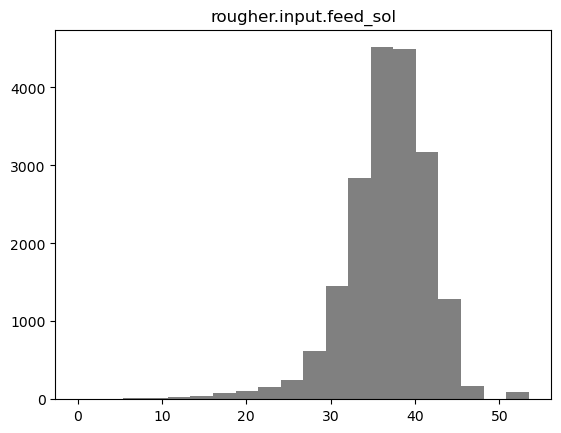

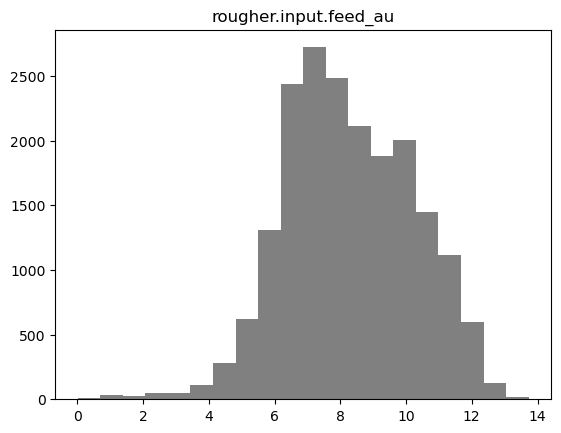

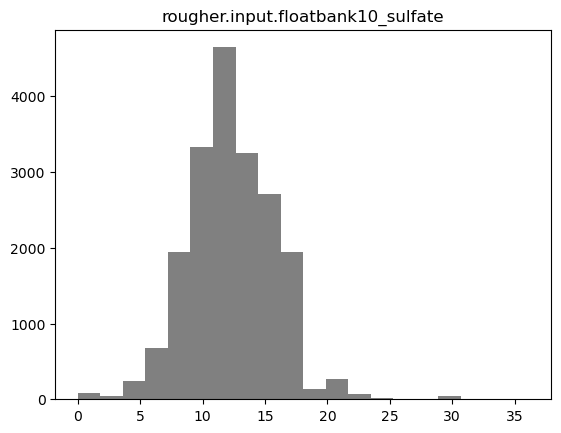

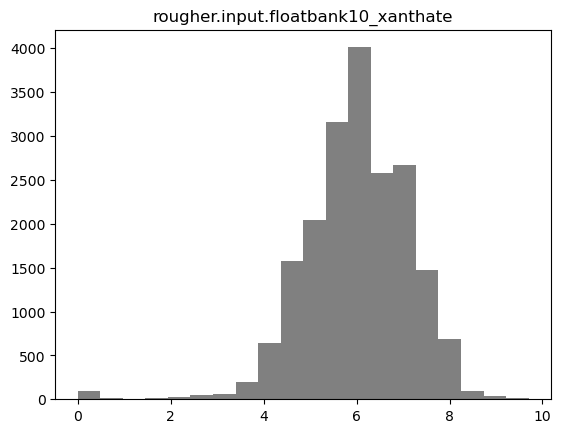

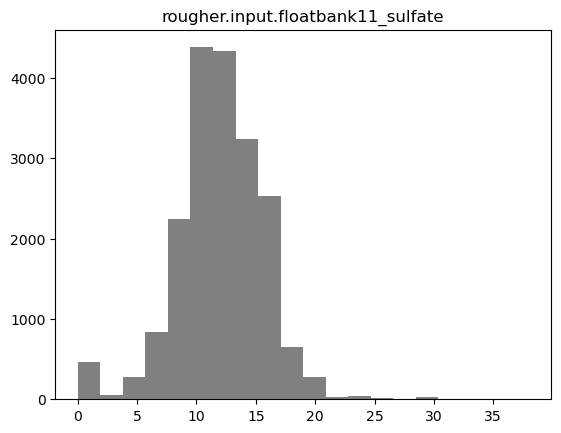

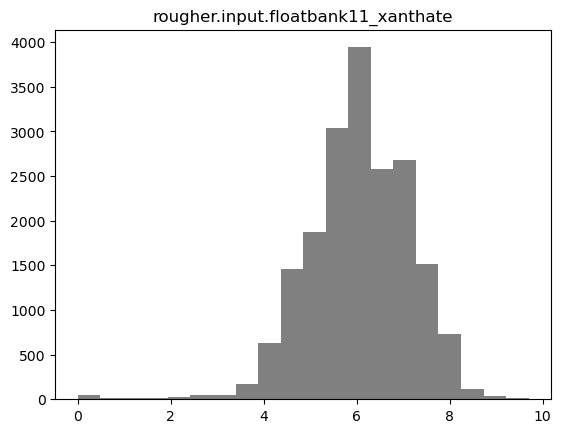

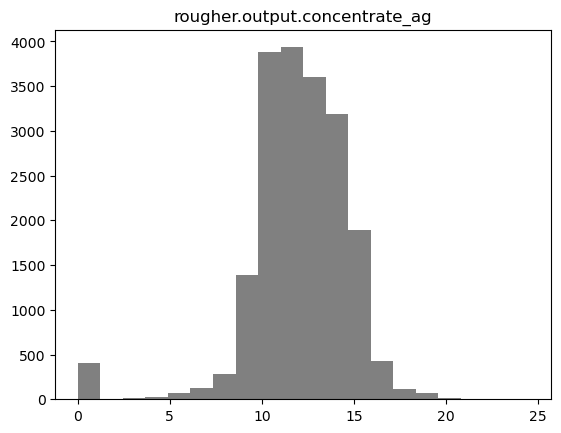

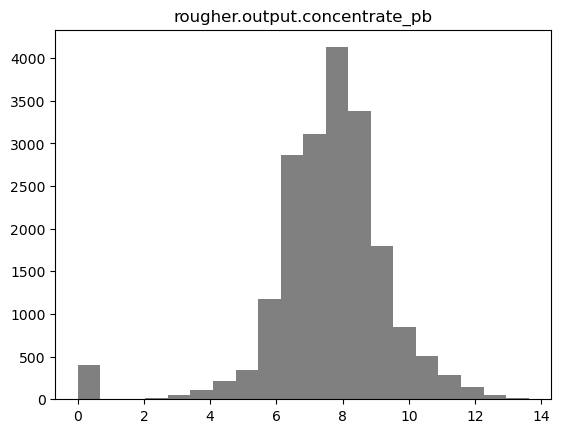

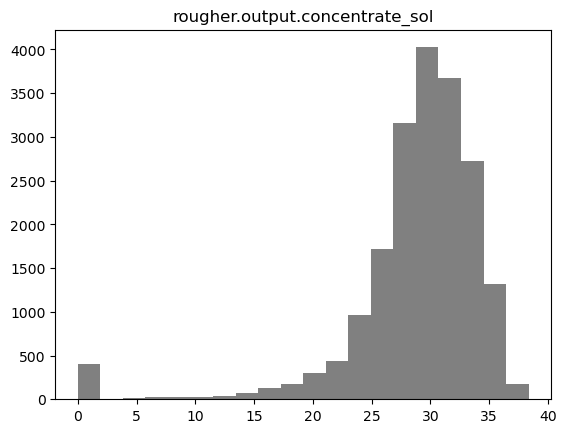

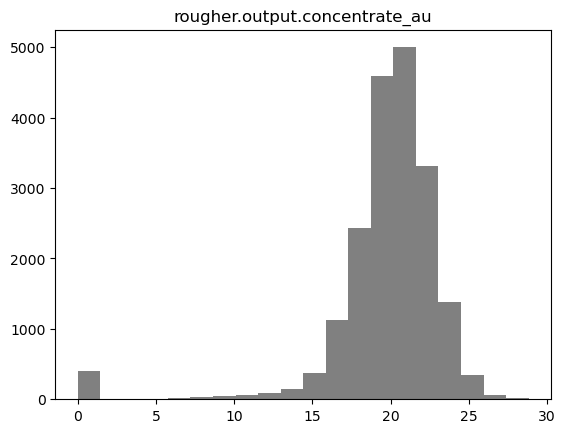

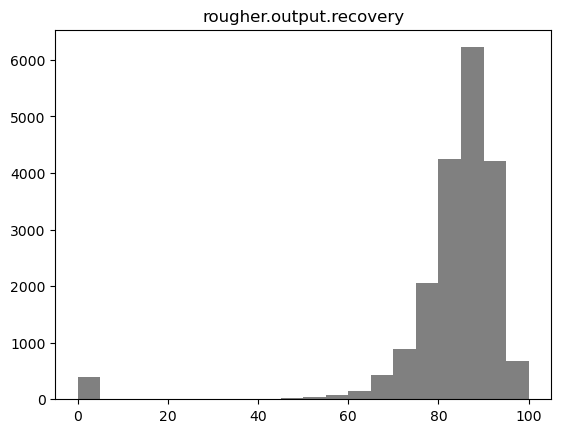

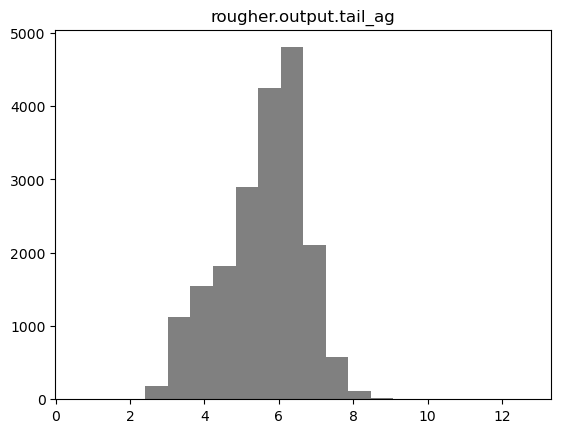

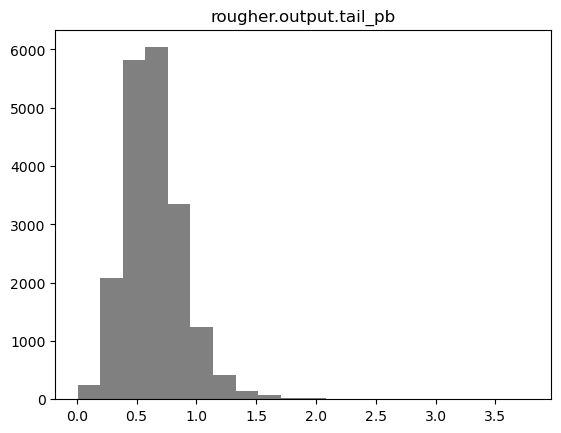

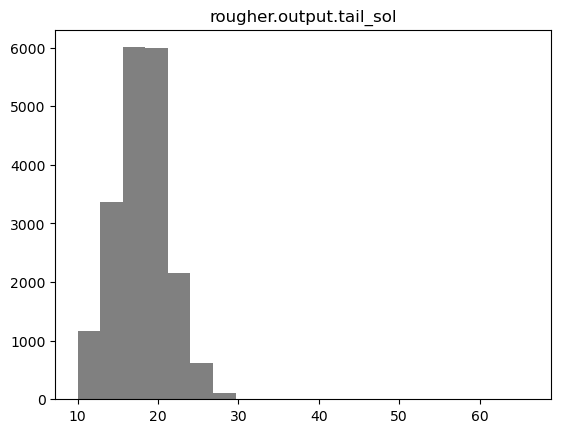

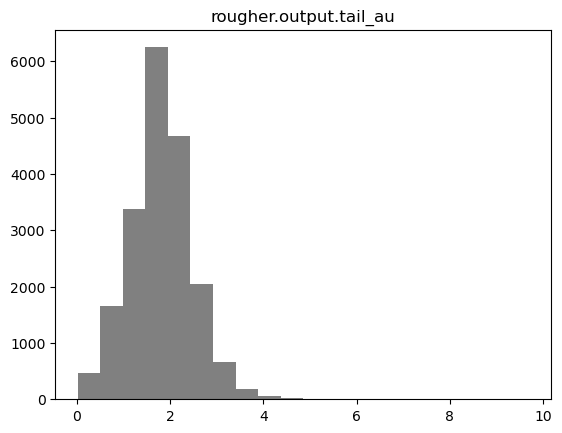

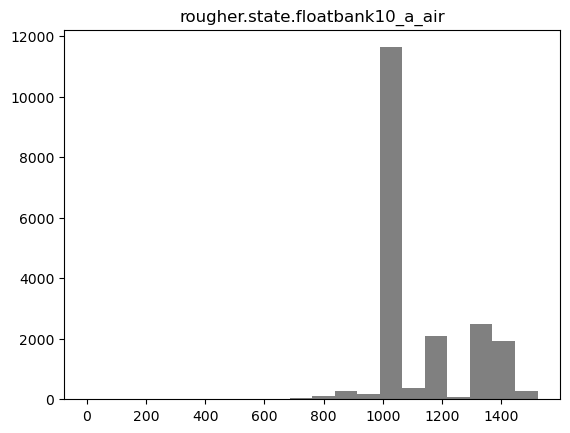

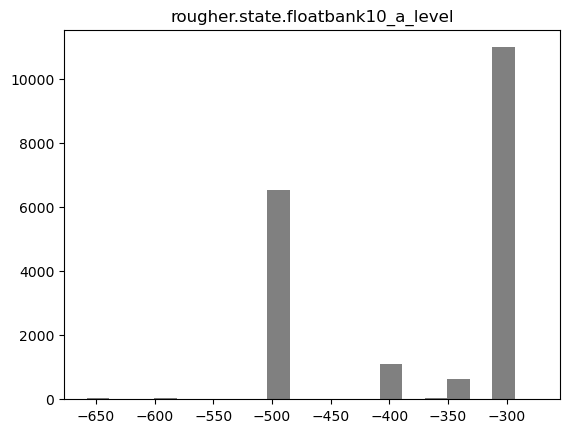

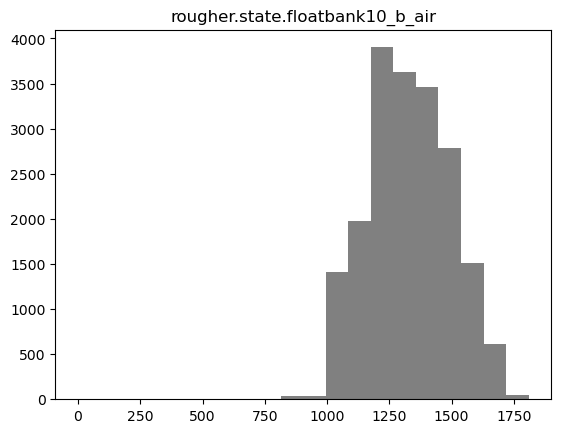

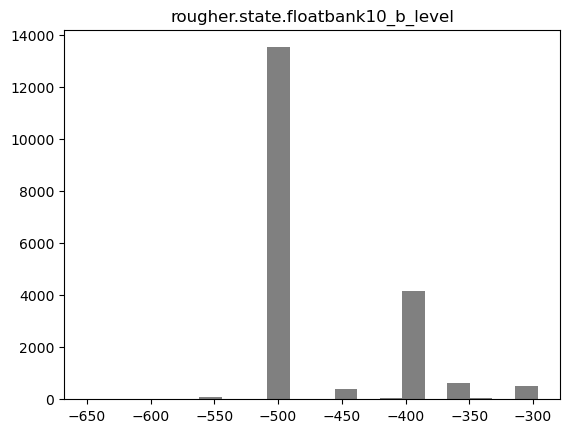

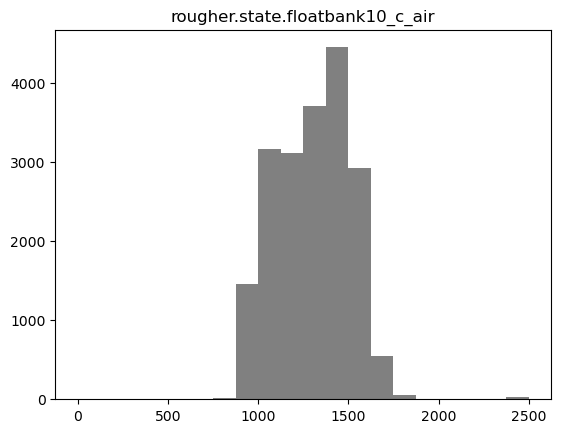

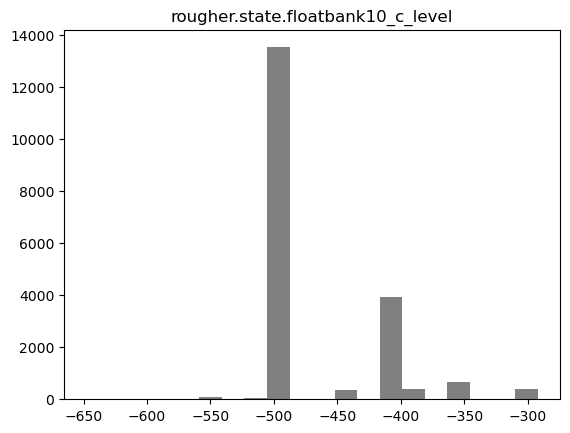

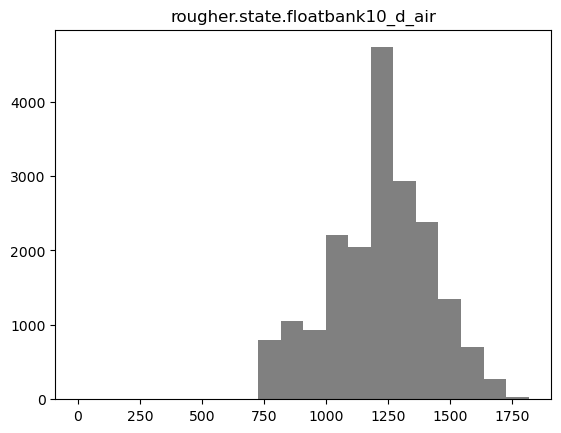

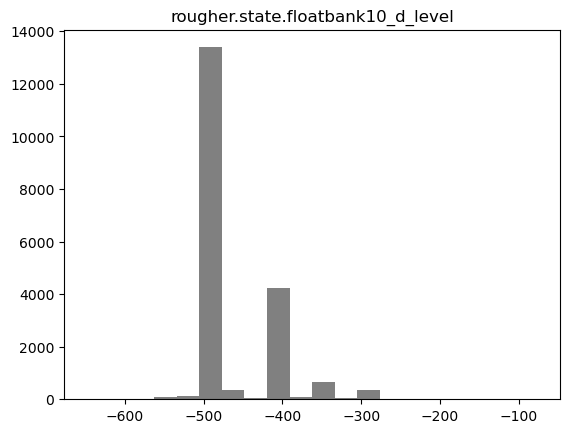

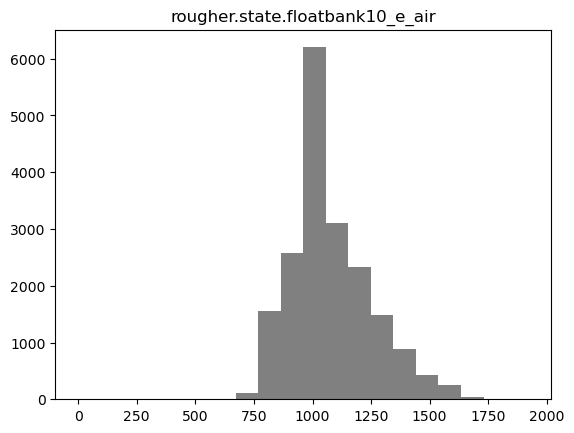

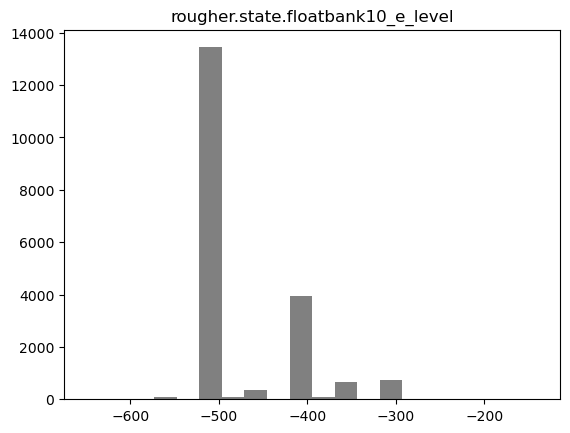

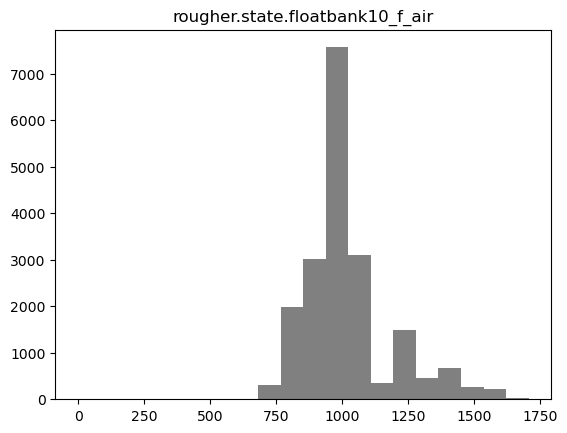

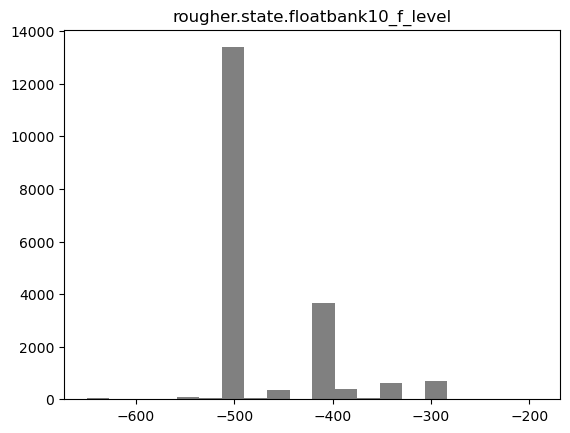

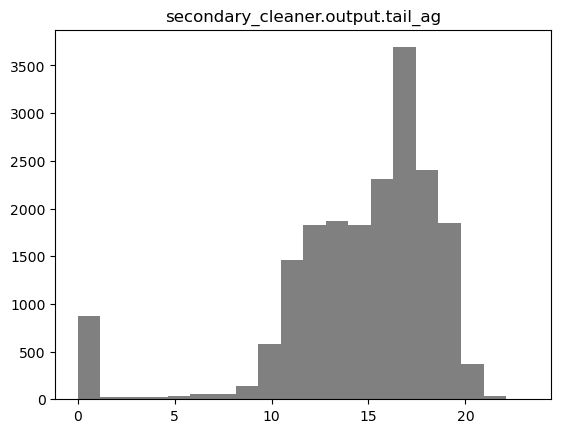

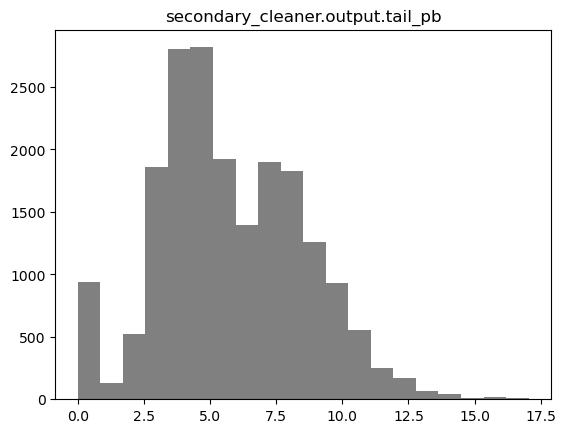

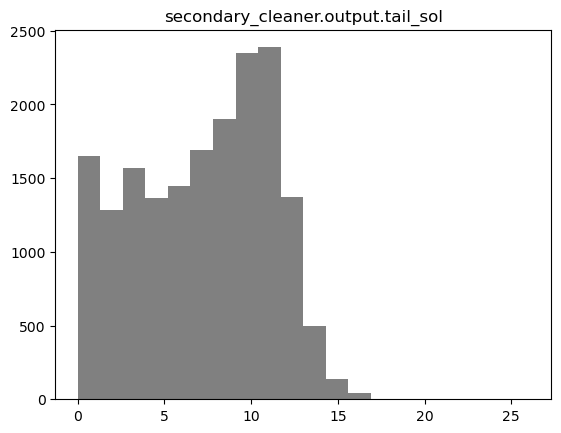

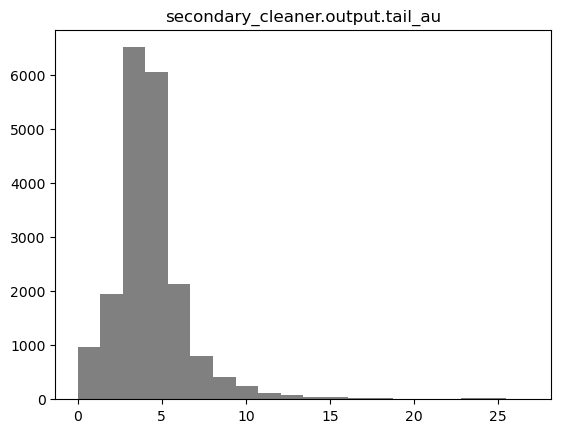

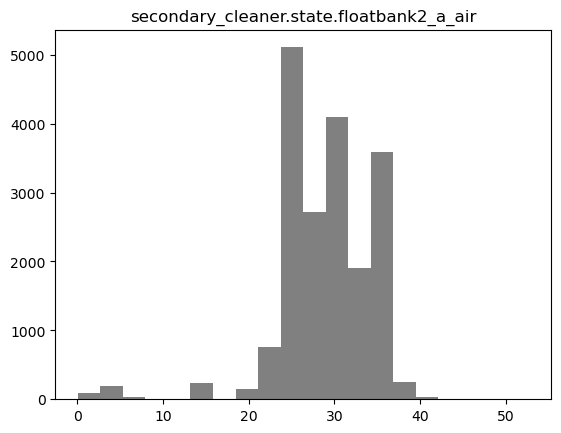

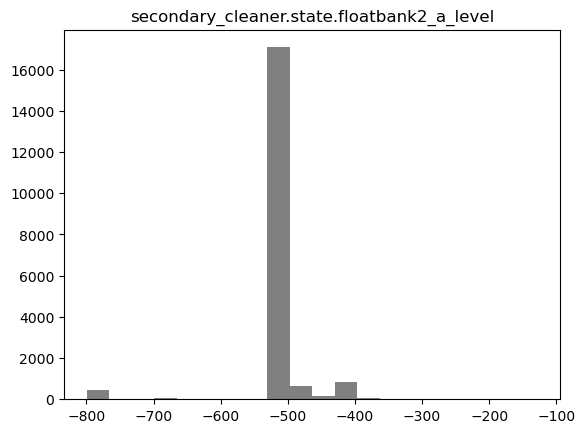

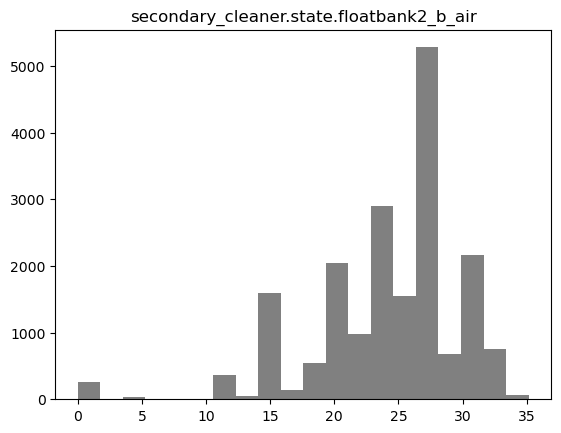

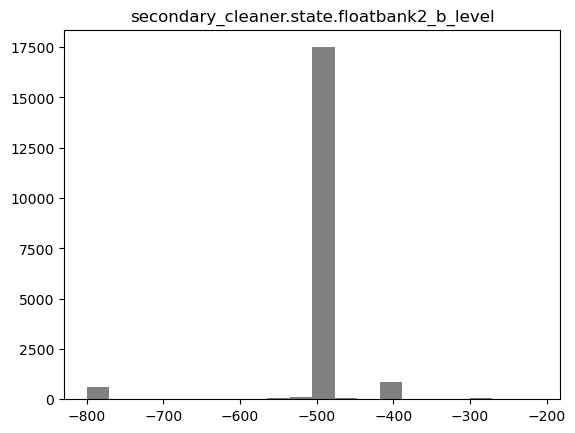

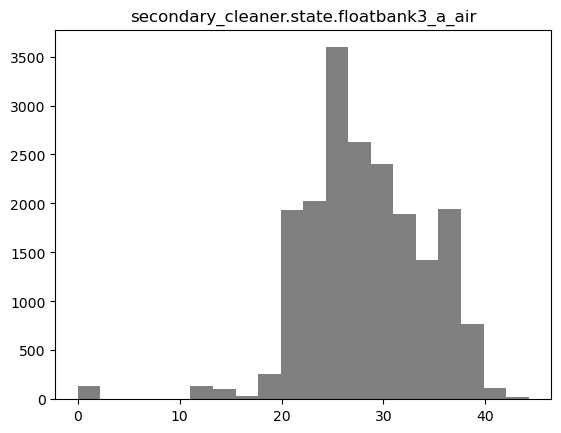

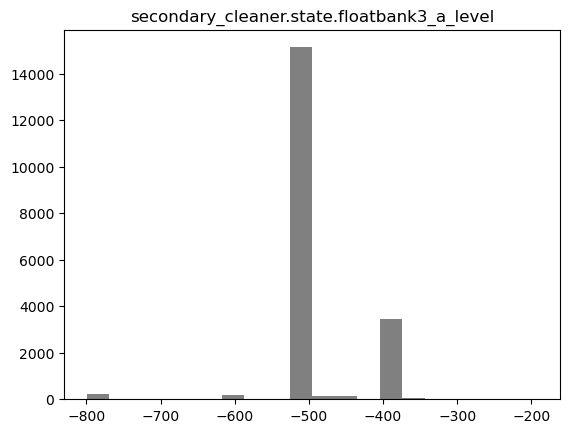

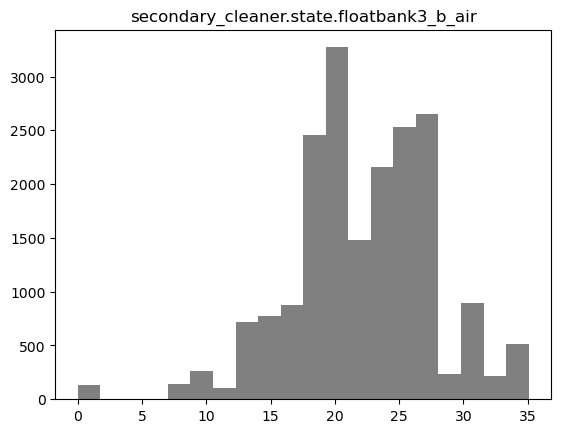

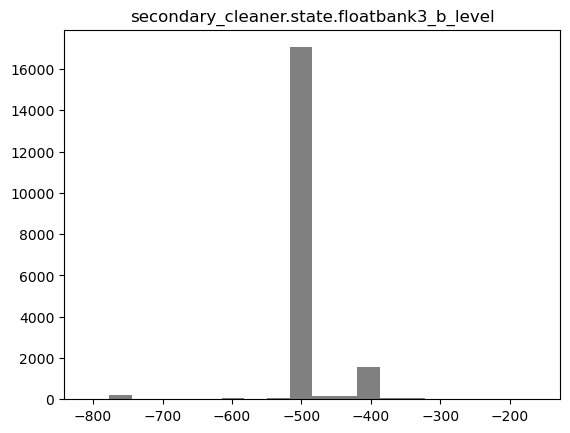

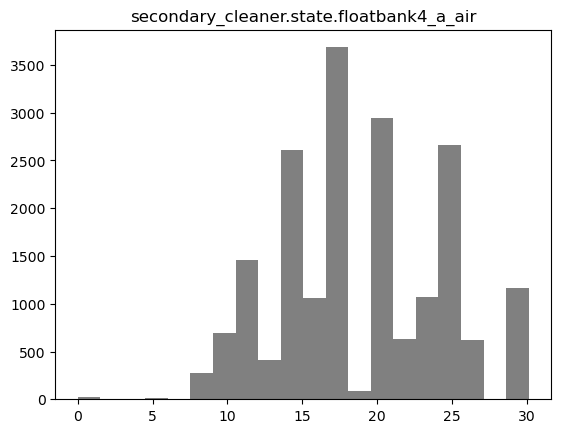

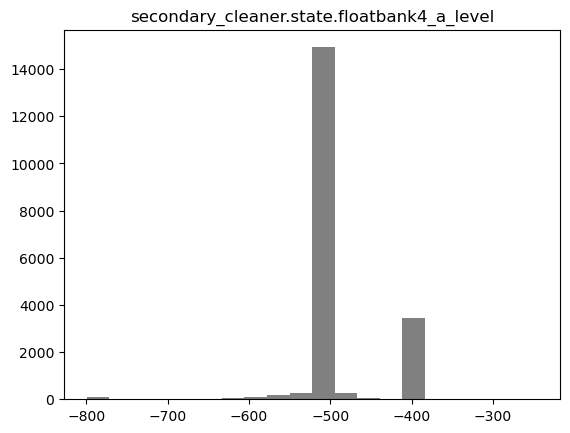

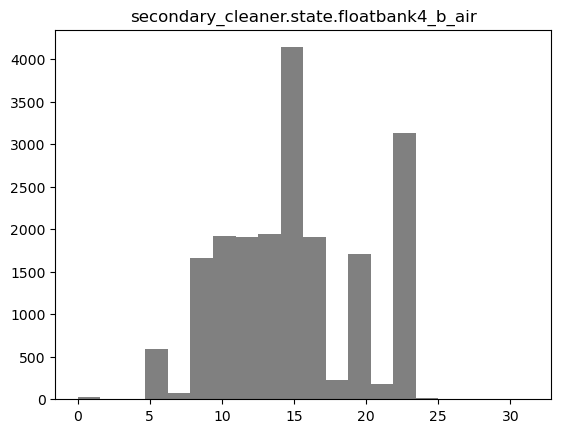

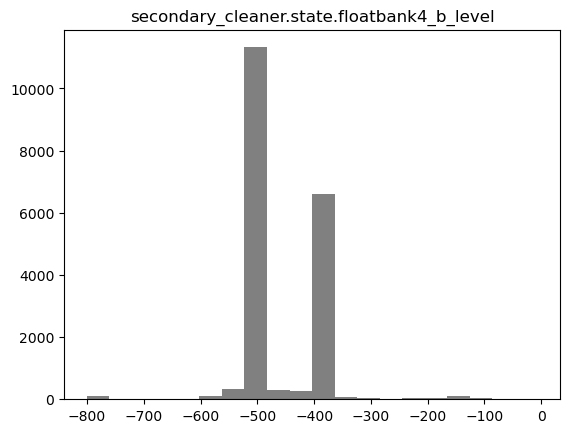

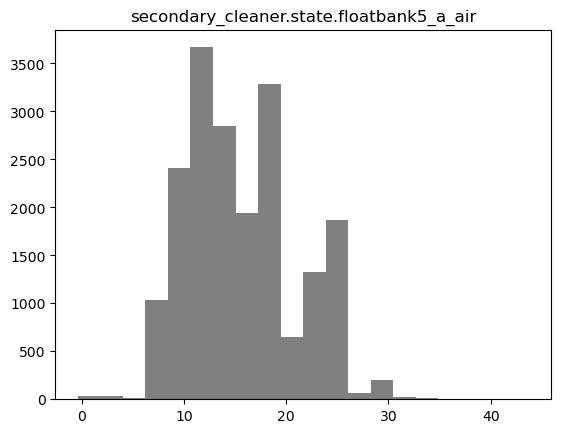

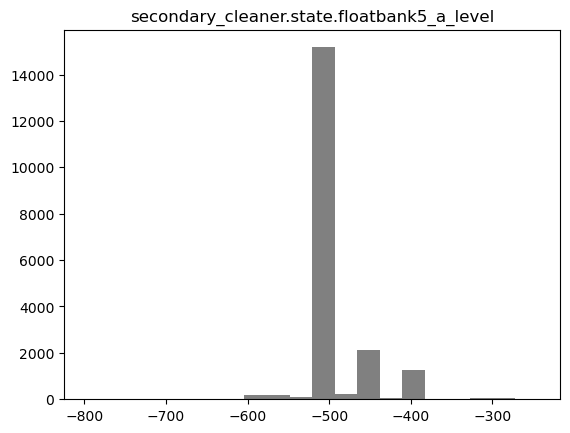

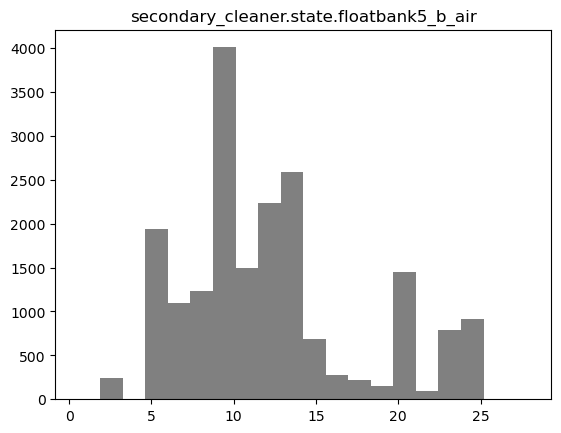

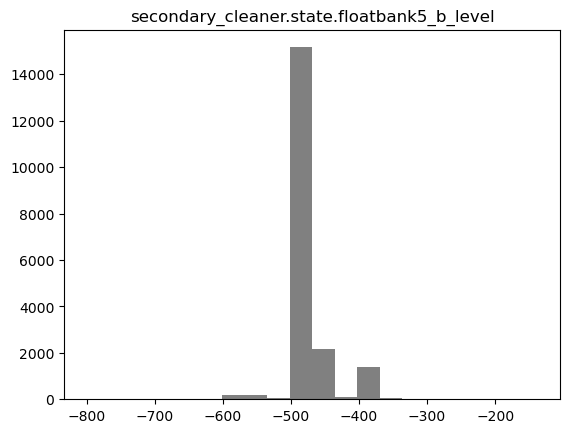

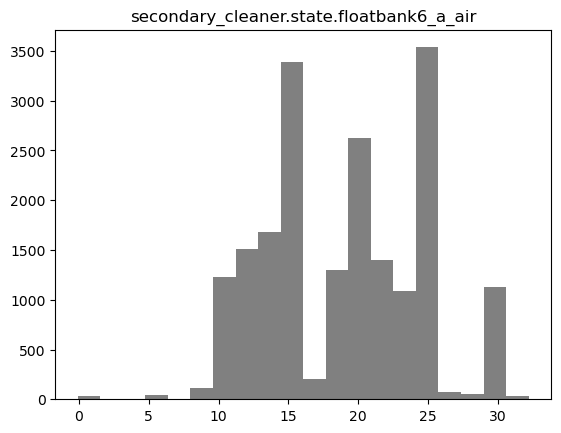

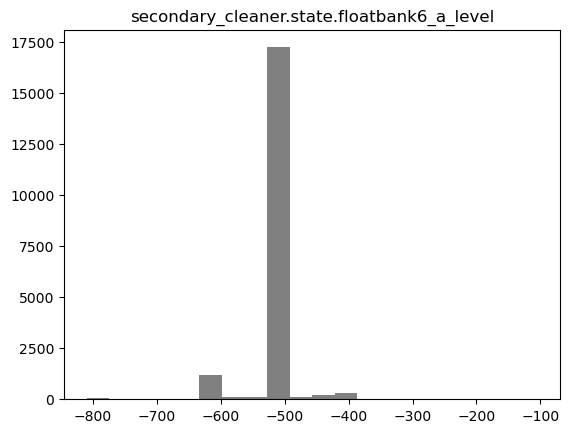

In [10]:
hist_maker(gold_recovery_full_new)

### Разница между колонками исходного датасета и тестового

In [11]:
def columns_differense(data_1, data_2):
    data_1_columns = []
    for column in data_1.columns:
        data_1_columns.append(column)

    data_2_columns = []
    for column in data_2.columns:
        data_2_columns.append(column)

    diff_columns = pd.Series(list(set(data_1_columns) - set(data_2_columns)))
    diff_columns = diff_columns.sort_values().reset_index(drop = True)
    return diff_columns

In [12]:
print('Столбцы, отсутствующие в тестовом датасете и присутствующие в полном:', '\n')
display(columns_differense(gold_recovery_full_new, gold_recovery_test_new))

Столбцы, отсутствующие в тестовом датасете и присутствующие в полном: 



0                           final.output.concentrate_ag
1                           final.output.concentrate_au
2                           final.output.concentrate_pb
3                          final.output.concentrate_sol
4                                 final.output.recovery
5                                  final.output.tail_ag
6                                  final.output.tail_au
7                                  final.output.tail_pb
8                                 final.output.tail_sol
9                 primary_cleaner.output.concentrate_ag
10                primary_cleaner.output.concentrate_au
11                primary_cleaner.output.concentrate_pb
12               primary_cleaner.output.concentrate_sol
13                       primary_cleaner.output.tail_ag
14                       primary_cleaner.output.tail_au
15                       primary_cleaner.output.tail_pb
16                      primary_cleaner.output.tail_sol
17                      rougher.calculation.au_p

#### Замечание по признакам отсутствующим в тестовом датасете

Выше перечислен целый набор признаков, присутствующий в полном и тренировочном датасете, но отсутствующий в тестовом. Эти признаки - концентрации веществ на разных этапах очистки. Этой информации нет в тестовом датасете, так как на начало работы с золотоносной рудой мы не можем знать этих величин. 

### Проверка правильности расчета эффективности обогащения

In [13]:
def recovery_check_mae(data):    
    data['rougher.output.recovery.check'] = 100 * (data['rougher.output.concentrate_au'] * (data['rougher.input.feed_au'] - data['rougher.output.tail_au']))/(data['rougher.input.feed_au'] * (data['rougher.output.concentrate_au'] - data['rougher.output.tail_au']))
    return mean_absolute_error(data['rougher.output.recovery'], data['rougher.output.recovery.check'])

In [14]:
print('MAE расчета эффективности обогащения:', recovery_check_mae(gold_recovery_train_new))
gold_recovery_train_new = gold_recovery_train_new.drop(['rougher.output.recovery.check'], axis = 1)

MAE расчета эффективности обогащения: 1.1131451184435918e-14


### Предобработка данных

#### Проверка на дубликаты

In [15]:
print('Количество дубликатов в полном датасете:', gold_recovery_full_new.duplicated().sum())

Количество дубликатов в полном датасете: 0


#### Добавление недостающих данных в gold_recovery_test_new, необходимых для валидации

In [16]:
gold_recovery_test_new = gold_recovery_test_new.merge(gold_recovery_full_new[['final.output.recovery', 'rougher.output.recovery', 'date']], how = 'left', on = 'date')

#### Заполнение пропусков

In [17]:
gold_recovery_train_new = gold_recovery_train_new.fillna(method = 'bfill')
gold_recovery_test_new = gold_recovery_test_new.fillna(method = 'bfill')

print(gold_recovery_train_new.info())
print(gold_recovery_test_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14149 non-null  float64
 2   final.output.concentrate_pb                         14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14149 non-null  float64
 8   final.output.tail_sol                               14149 non-null  float64


#### Изменение типов данных

In [18]:
gold_recovery_train_new['date'] = pd.to_datetime(gold_recovery_train_new['date'], format = '%Y-%m-%d %H:%M:%S')
gold_recovery_test_new['date'] = pd.to_datetime(gold_recovery_test_new['date'], format = '%Y-%m-%d %H:%M:%S')
gold_recovery_full_new['date'] = pd.to_datetime(gold_recovery_full_new['date'], format = '%Y-%m-%d %H:%M:%S')

display(gold_recovery_train_new.head(3))
display(gold_recovery_test_new.head(3))
display(gold_recovery_full_new.head(3))

print(gold_recovery_train_new.info())
print(gold_recovery_test_new.info())
print(gold_recovery_full_new.info())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14149 non-null  float64       
 2   final.output.concentrate_pb                         14149 non-null  float64       
 3   final.output.concentrate_sol                        14149 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14149 non-null  float64       
 8   final.

### Промежуточный вывод

На данный этап работы были открыты файлы с данными, информация изучена. Построены гистограммы по всем параметрам датасетов. Колонки, которых нет в датасете "test" и которые есть в "train" и "full" скорее всего представляют собой информацию, неизвестную на момент ДО начала работы с рудой (поэтому и не представлены в тестовой выборке). Для валидации все-таки 2 столбца туда добавить пришлось. Проверена правильность расчета эффективности обогащения, MAE = 1.113e-14, эффективность рассчитана верно. Произведена предобработка данных, заполнены пропуски ближайшими преддшествующими значениями, даты приведены к типу datetime. 

## Анализ данных

### Концентрация золота на разных этапах очистки

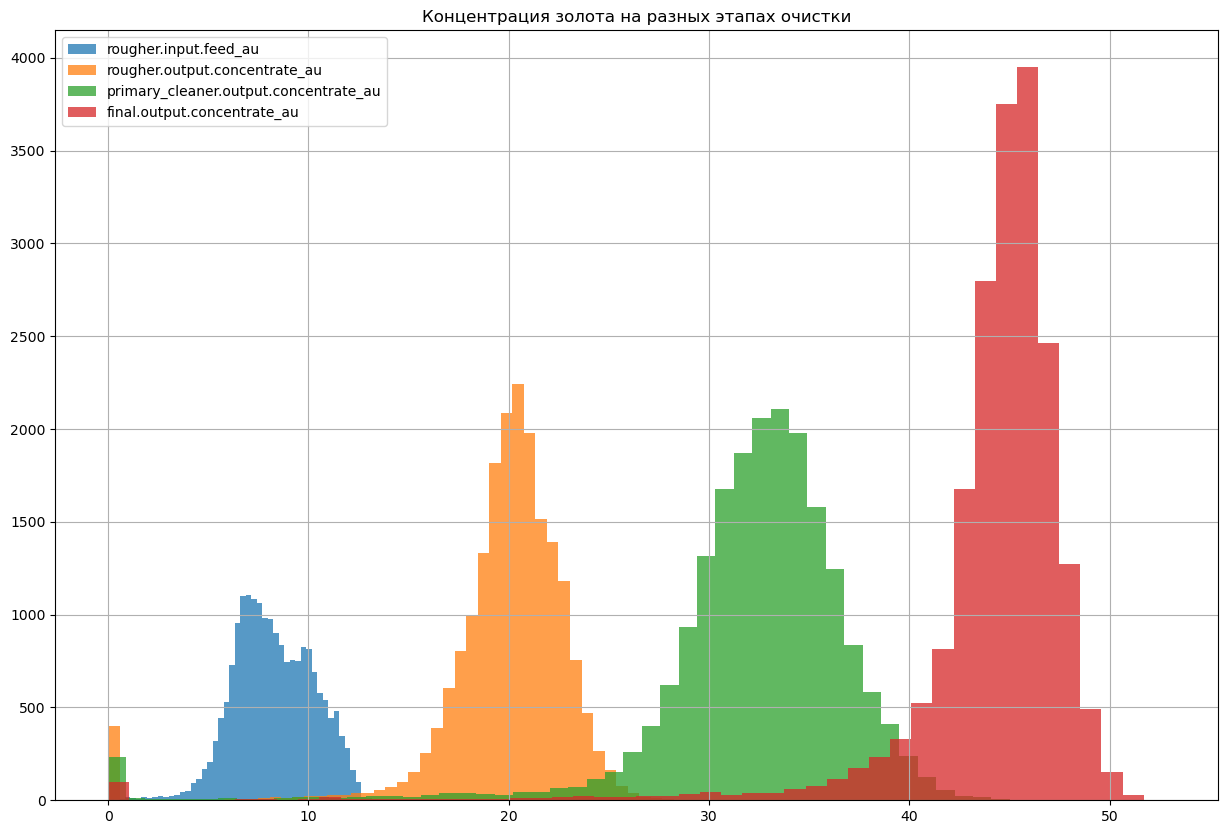

In [19]:
gold_recovery_full_new['rougher.input.feed_au'].hist(bins = 50, label = 'rougher.input.feed_au', alpha = 0.75, figsize = (15, 10))
gold_recovery_full_new['rougher.output.concentrate_au'].hist(bins = 50, label = 'rougher.output.concentrate_au', alpha = 0.75)
gold_recovery_full_new['primary_cleaner.output.concentrate_au'].hist(bins = 50, label = 'primary_cleaner.output.concentrate_au', alpha = 0.75)
gold_recovery_full_new['final.output.concentrate_au'].hist(bins = 50, label = 'final.output.concentrate_au', alpha = 0.75)

plt.title('Концентрация золота на разных этапах очистки')
plt.legend()
plt.show()

### Концентрация серебра на разных этапах очистки

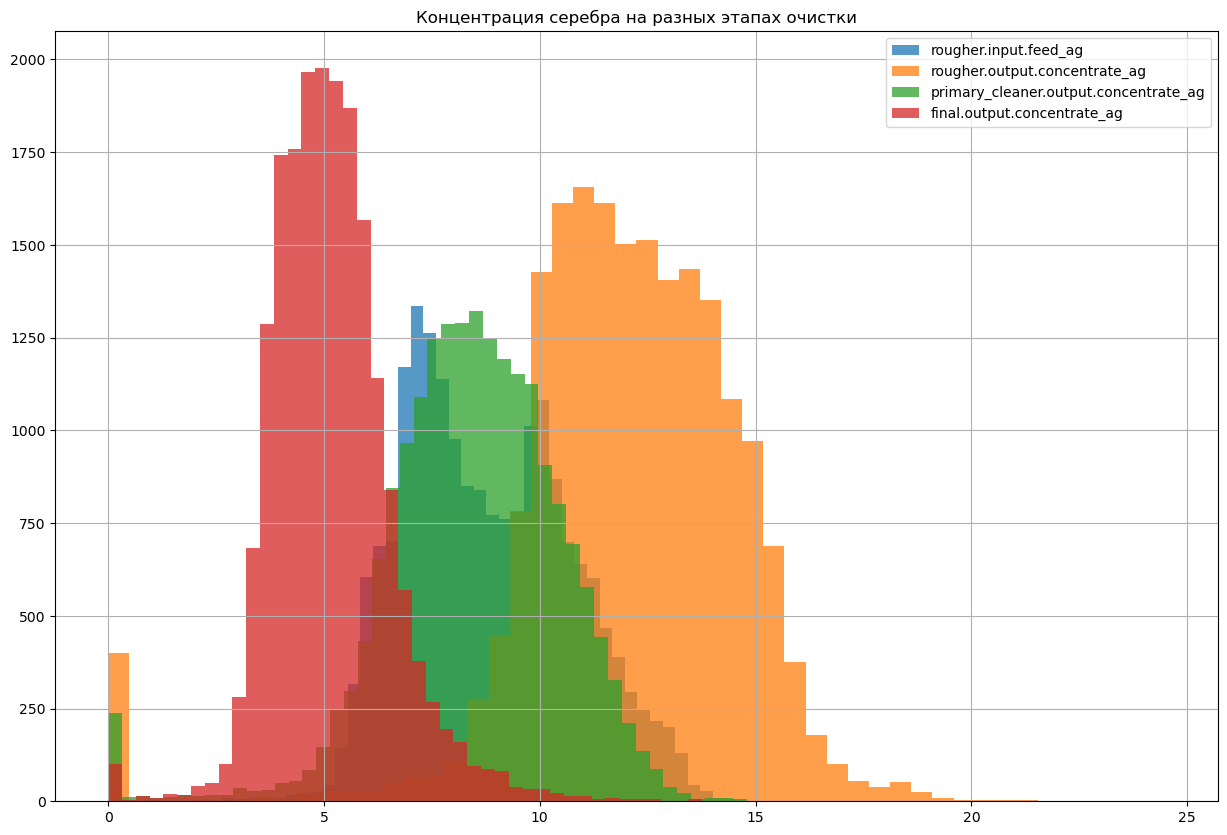

In [20]:
gold_recovery_full_new['rougher.input.feed_ag'].hist(bins = 50, label = 'rougher.input.feed_ag', alpha = 0.75, figsize = (15, 10))
gold_recovery_full_new['rougher.output.concentrate_ag'].hist(bins = 50, label = 'rougher.output.concentrate_ag', alpha = 0.75)
gold_recovery_full_new['primary_cleaner.output.concentrate_ag'].hist(bins = 50, label = 'primary_cleaner.output.concentrate_ag', alpha = 0.75)
gold_recovery_full_new['final.output.concentrate_ag'].hist(bins = 50, label = 'final.output.concentrate_ag', alpha = 0.75)

plt.title('Концентрация серебра на разных этапах очистки')
plt.legend()
plt.show()

### Концентрация свинца на разных этапах очистки

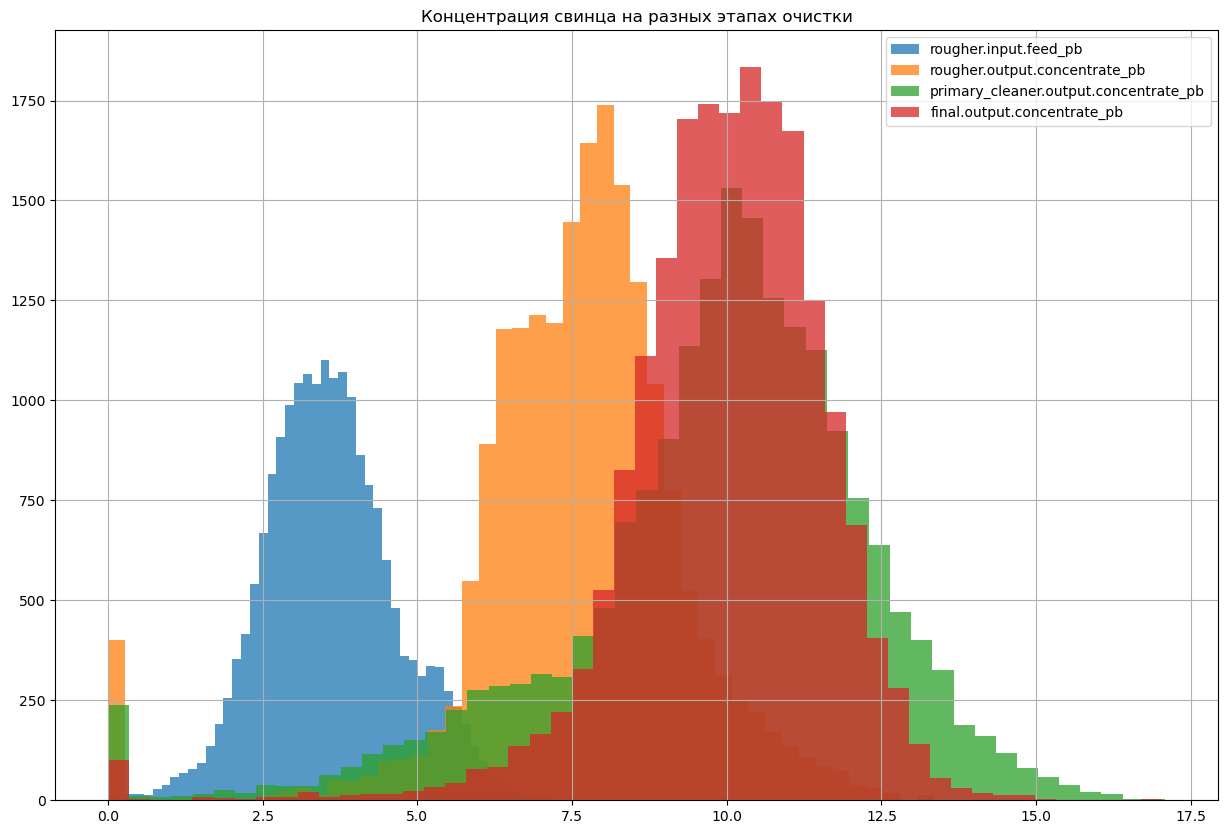

In [21]:
gold_recovery_full_new['rougher.input.feed_pb'].hist(bins = 50, label = 'rougher.input.feed_pb', alpha = 0.75, figsize = (15, 10))
gold_recovery_full_new['rougher.output.concentrate_pb'].hist(bins = 50, label = 'rougher.output.concentrate_pb', alpha = 0.75)
gold_recovery_full_new['primary_cleaner.output.concentrate_pb'].hist(bins = 50, label = 'primary_cleaner.output.concentrate_pb', alpha = 0.75)
gold_recovery_full_new['final.output.concentrate_pb'].hist(bins = 50, label = 'final.output.concentrate_pb', alpha = 0.75)

plt.title('Концентрация свинца на разных этапах очистки')
plt.legend()
plt.show()

#### Замечание по графическому анализу распределений концентраций веществ на разных этапах очистки

Распределения содержаний веществ на разных этапах очистки выглядят подобно нормальному распределению. Некоторые распределения скошены. Для всех распределений справедливо наличие большого количества выбросов около нулевого значения концентрации. В дальнейшем около нулевые значения будут убраны из данных. 

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках на разных этапах

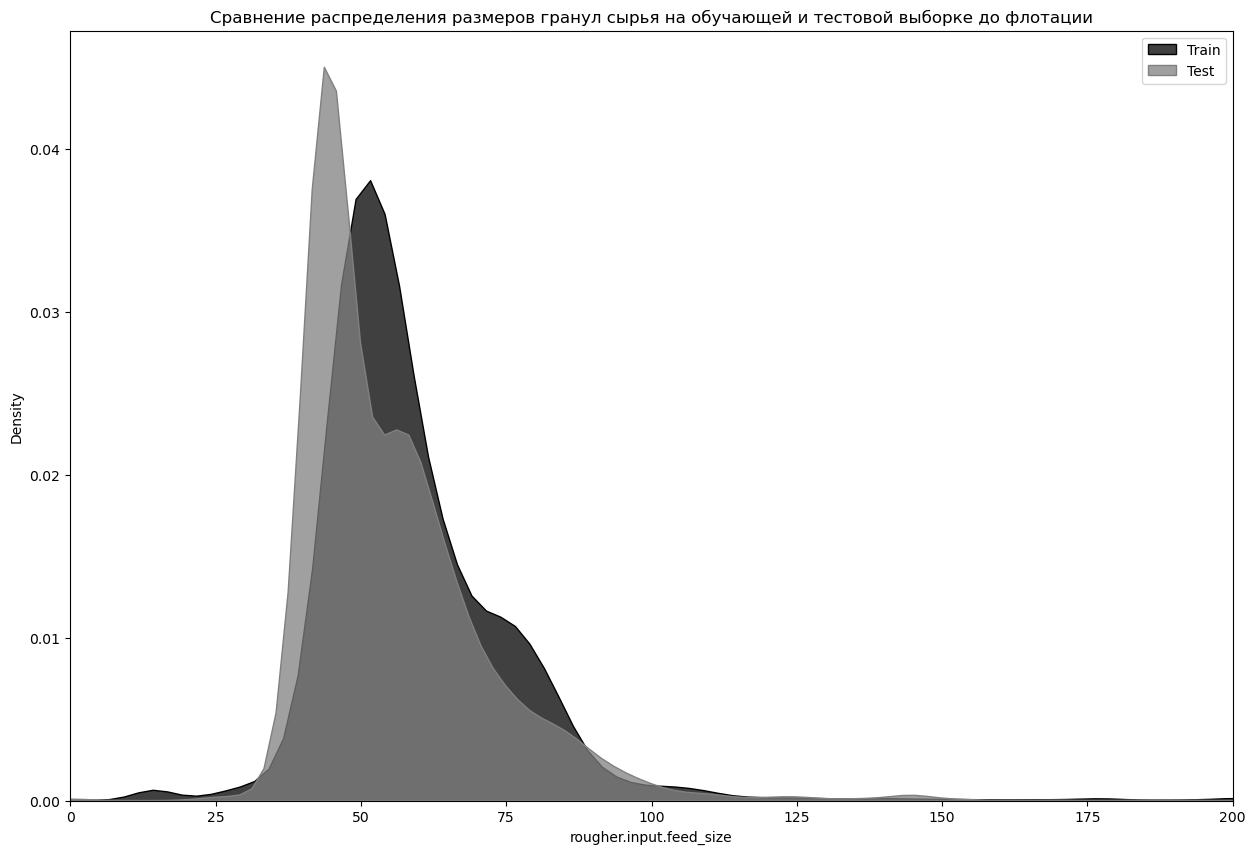

In [22]:
plt.figure(figsize = (15, 10))
sb.kdeplot(gold_recovery_train_new['rougher.input.feed_size'], label = 'Train', alpha = 0.75, color = 'black', shade = True)
sb.kdeplot(gold_recovery_test_new['rougher.input.feed_size'], label = 'Test', alpha = 0.75, color = 'gray', shade = True)
plt.xlim(0, 200)

plt.title('Сравнение распределения размеров гранул сырья на обучающей и тестовой выборке до флотации')
plt.legend()
plt.show()

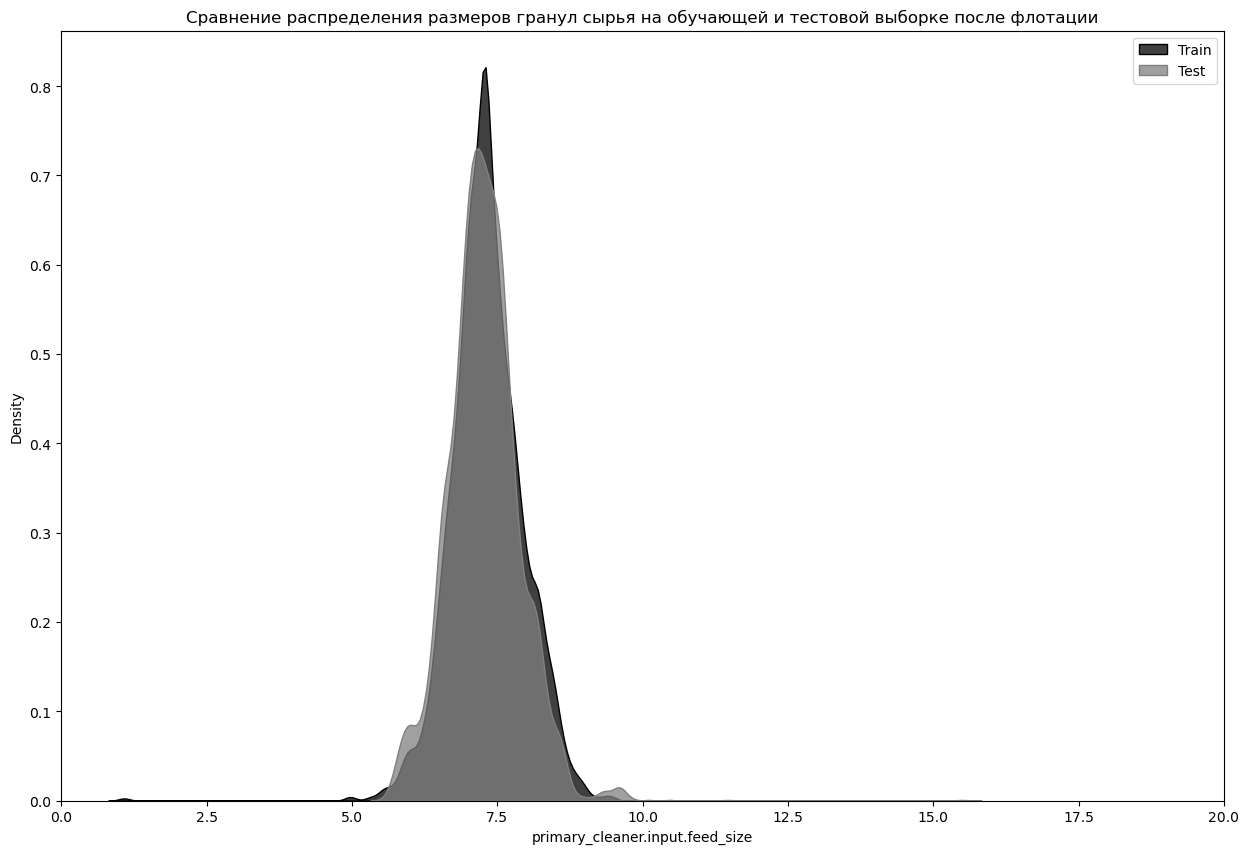

In [23]:
plt.figure(figsize = (15, 10))
sb.kdeplot(gold_recovery_train_new['primary_cleaner.input.feed_size'], label = 'Train', alpha = 0.75, color = 'black', shade = True)
sb.kdeplot(gold_recovery_test_new['primary_cleaner.input.feed_size'], label = 'Test', alpha = 0.75, color = 'gray', shade = True)
plt.xlim(0, 20)

plt.title('Сравнение распределения размеров гранул сырья на обучающей и тестовой выборке после флотации')
plt.legend()
plt.show()

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

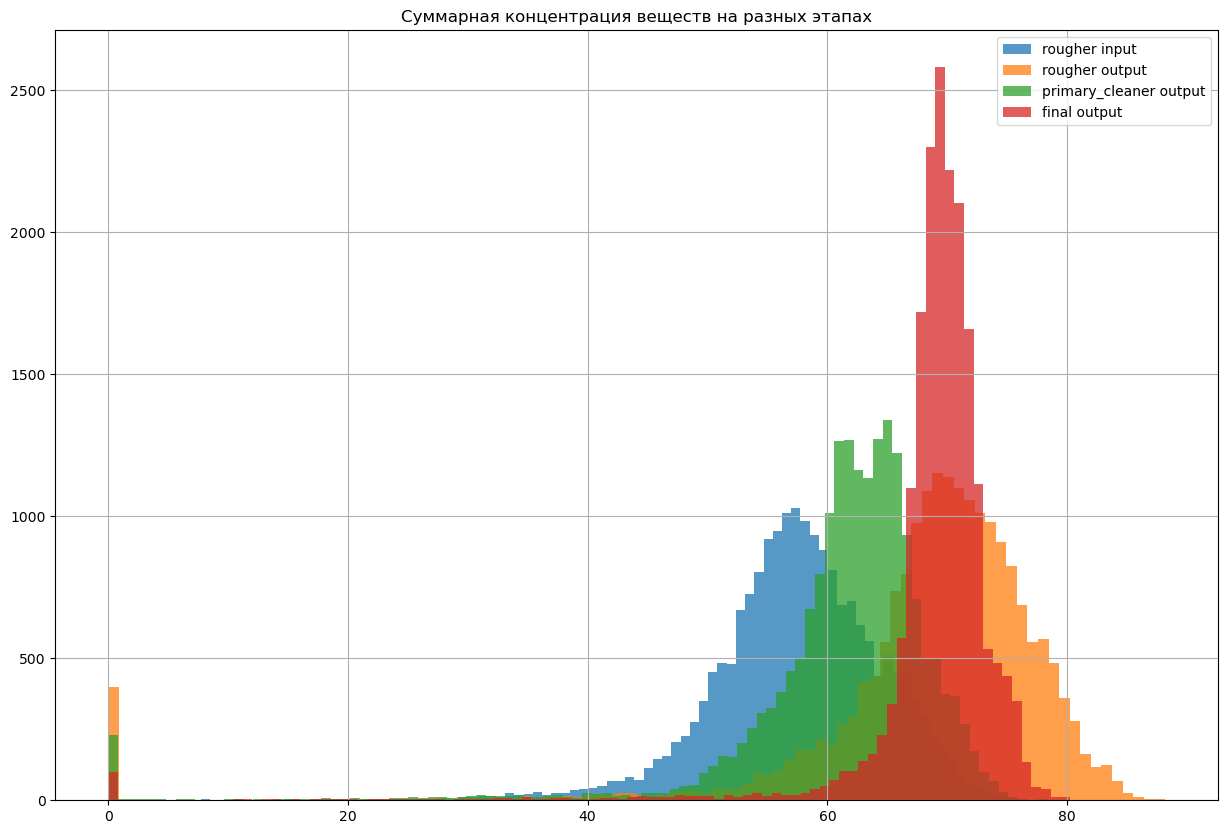

In [24]:
concentrates = pd.DataFrame()

concentrates['rougher.input.feed_au_ag_pb_sol'] = gold_recovery_full_new['rougher.input.feed_au'] + gold_recovery_full_new['rougher.input.feed_ag'] + gold_recovery_full_new['rougher.input.feed_pb'] + gold_recovery_full_new['rougher.input.feed_sol']
concentrates['rougher.output.concentrate_au_ag_pb_sol'] = gold_recovery_full_new['rougher.output.concentrate_au'] + gold_recovery_full_new['rougher.output.concentrate_ag'] + gold_recovery_full_new['rougher.output.concentrate_pb'] + gold_recovery_full_new['rougher.output.concentrate_sol']
concentrates['primary_cleaner.output.concentrate_au_ag_pb_sol'] = gold_recovery_full_new['primary_cleaner.output.concentrate_au'] + gold_recovery_full_new['primary_cleaner.output.concentrate_ag'] + gold_recovery_full_new['primary_cleaner.output.concentrate_pb'] + gold_recovery_full_new['primary_cleaner.output.concentrate_sol']
concentrates['final.output.concentrate_au_ag_pb_sol'] = gold_recovery_full_new['final.output.concentrate_au'] + gold_recovery_full_new['final.output.concentrate_ag'] + gold_recovery_full_new['final.output.concentrate_pb'] + gold_recovery_full_new['final.output.concentrate_sol']

plt.figure(figsize = (15, 10))
concentrates['rougher.input.feed_au_ag_pb_sol'].hist(bins = 100, label = 'rougher input', alpha = 0.75)
concentrates['rougher.output.concentrate_au_ag_pb_sol'].hist(bins = 100, label = 'rougher output', alpha = 0.75)
concentrates['primary_cleaner.output.concentrate_au_ag_pb_sol'].hist(bins = 100, label = 'primary_cleaner output', alpha = 0.75)
concentrates['final.output.concentrate_au_ag_pb_sol'].hist(bins = 100, label = 'final output', alpha = 0.75)

plt.title('Суммарная концентрация веществ на разных этапах')
plt.legend()
plt.show()

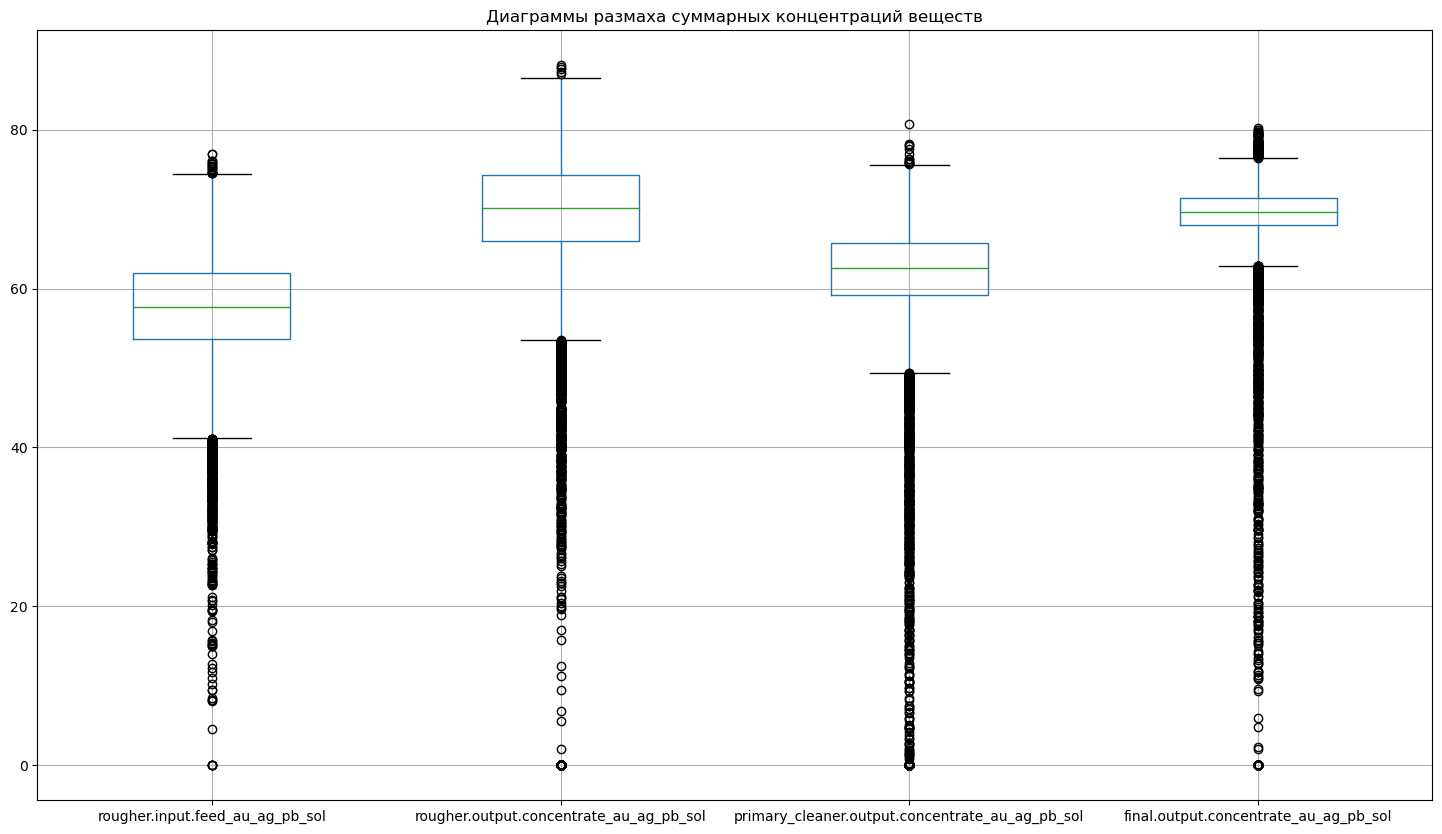

In [25]:
concentrates.boxplot(figsize = (18, 10))
plt.title('Диаграммы размаха суммарных концентраций веществ')
plt.show()

In [26]:
concentrates.describe()

,rougher.input.feed_au_ag_pb_sol,rougher.output.concentrate_au_ag_pb_sol,primary_cleaner.output.concentrate_au_ag_pb_sol,final.output.concentrate_au_ag_pb_sol
count,19245.000000,19416.000000,19069.000000,19227.000000
mean,57.407926,68.188914,60.949928,68.727562
std,7.165219,12.478522,9.953770,7.423741
min,0.040000,0.000000,0.000000,0.000000
25%,53.660745,66.026048,59.165854,67.985659
50%,57.647093,70.186130,62.615189,69.632597
75%,62.012223,74.362878,65.725507,71.390461
max,76.978947,88.140119,80.749343,80.210644


В распределениях концентраций веществ на всех этапах заметны выбросы около 0. Эти значения в выборках "train" и "test" будут удалены.

### Удаление выбросов

In [27]:
def concentrates_emission_cleaner(data, treshold):    
    data = data.loc[(data['rougher.input.feed_au'] >= treshold) & (data['rougher.input.feed_ag'] >= treshold) & (data['rougher.input.feed_pb'] >= treshold) & (data['rougher.input.feed_sol'] >= treshold)]
    data = data.loc[(data['rougher.output.concentrate_au'] >= treshold) & (data['rougher.output.concentrate_ag'] >= treshold) & (data['rougher.output.concentrate_pb'] >= treshold) & (data['rougher.output.concentrate_sol'] >= treshold)]
    data = data.loc[(data['primary_cleaner.output.concentrate_au'] >= treshold) & (data['primary_cleaner.output.concentrate_ag'] >= treshold) & (data['primary_cleaner.output.concentrate_pb'] >= treshold) & (data['primary_cleaner.output.concentrate_sol'] >= treshold)]
    data = data.loc[(data['final.output.concentrate_au'] >= treshold) & (data['final.output.concentrate_ag'] >= treshold) & (data['final.output.concentrate_pb'] >= treshold) & (data['final.output.concentrate_sol'] >= treshold)]
    
    return data

#### Проверка данных после удаления выбросов из выборки train

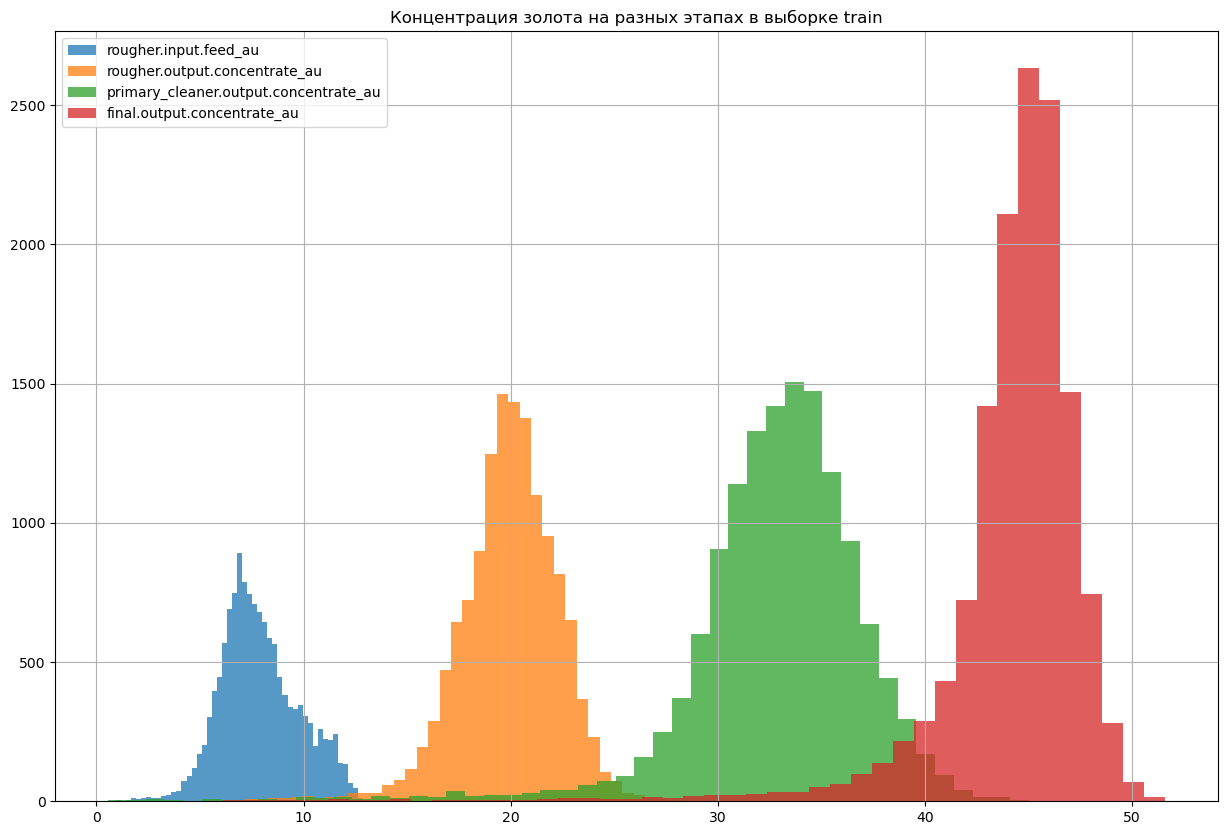

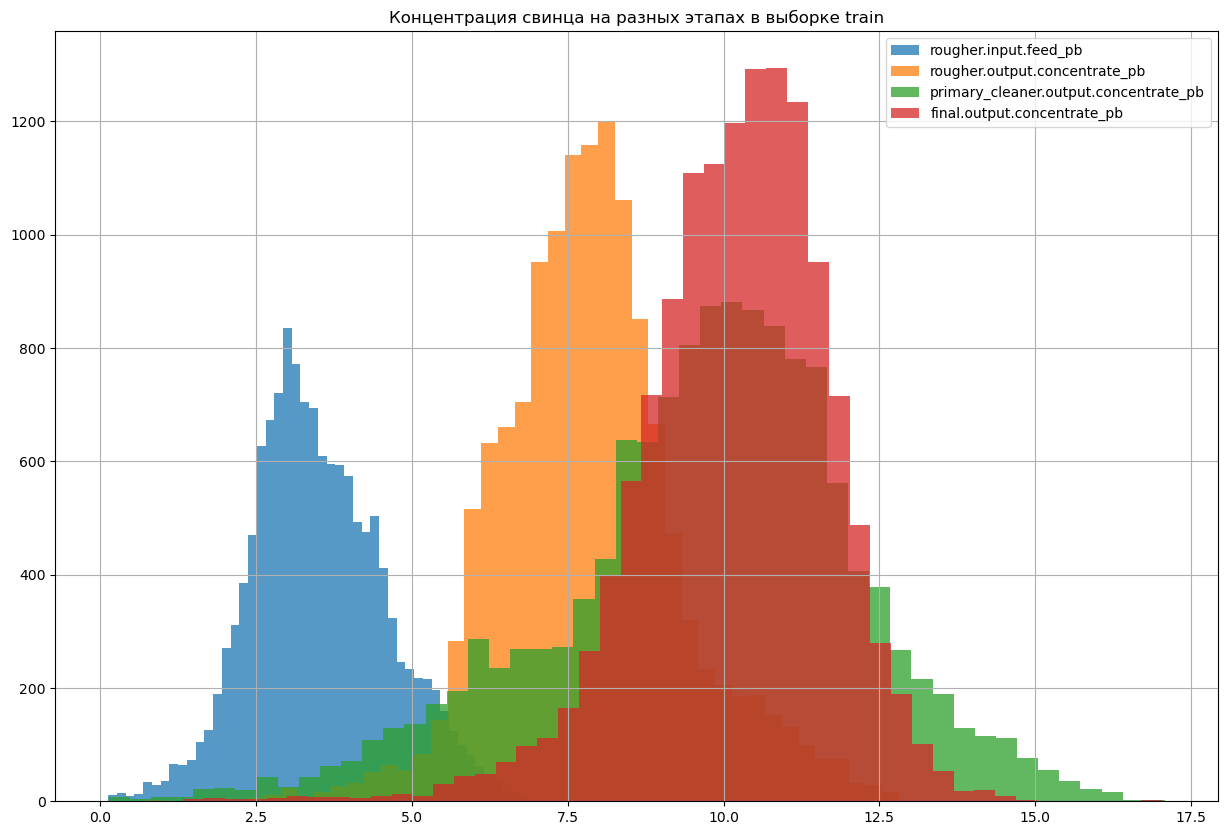

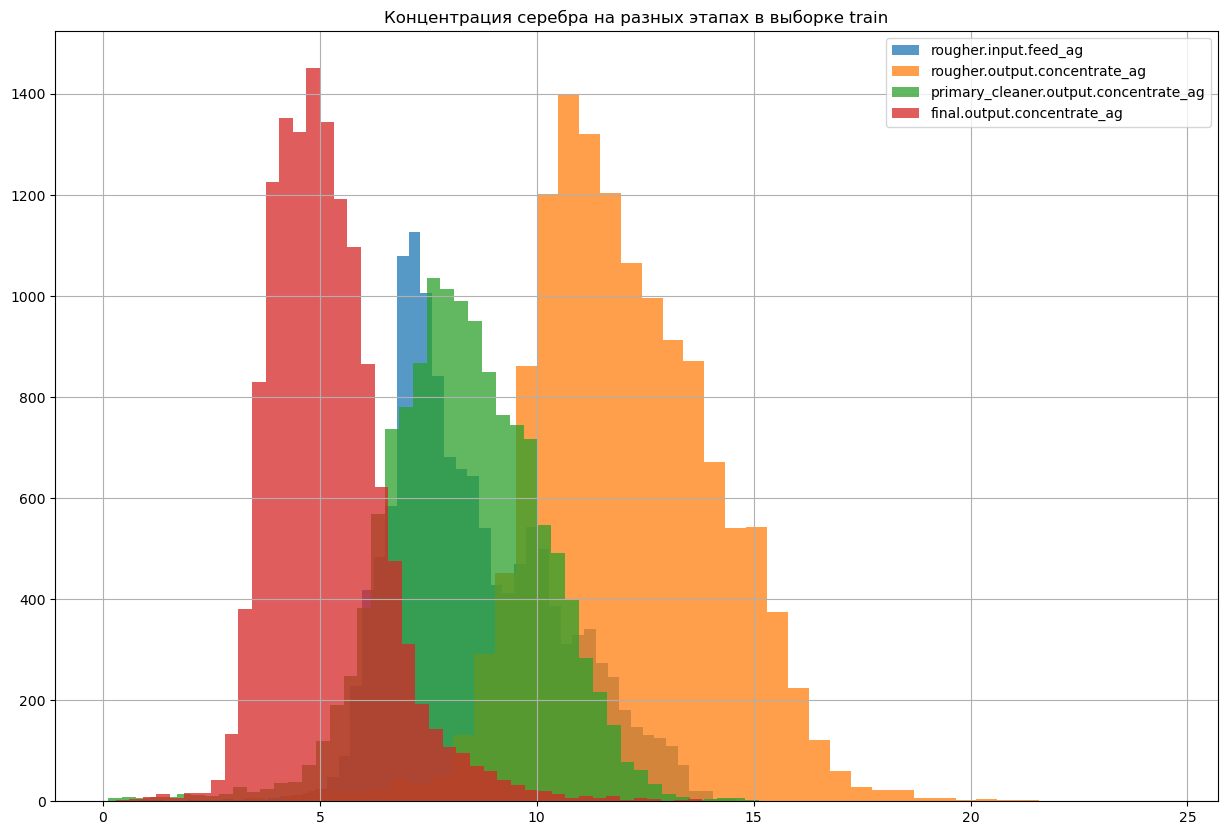

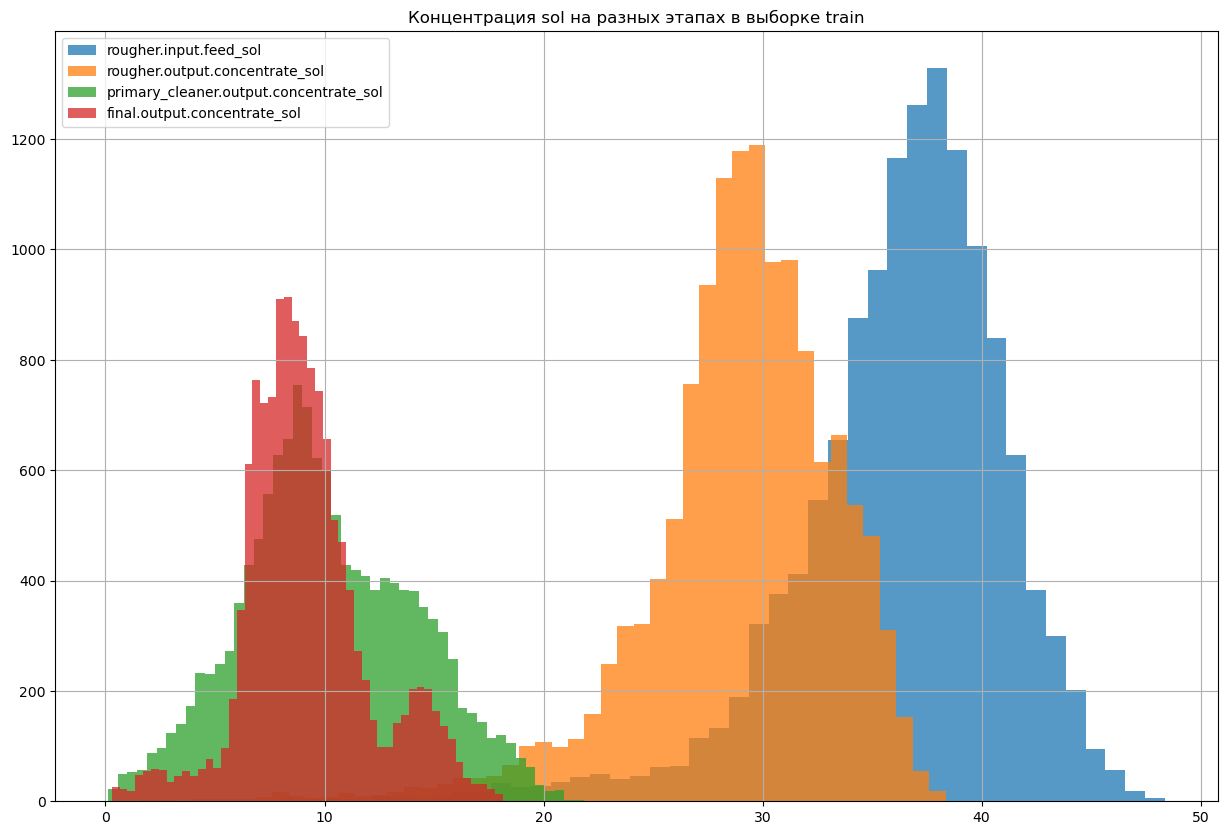

In [28]:
gold_recovery_train_new_shape_before = gold_recovery_train_new.shape[0]

gold_recovery_train_new = concentrates_emission_cleaner(gold_recovery_train_new, 0.1)

gold_recovery_train_new['rougher.input.feed_au'].hist(bins = 50, label = 'rougher.input.feed_au', alpha = 0.75, figsize = (15, 10))
gold_recovery_train_new['rougher.output.concentrate_au'].hist(bins = 50, label = 'rougher.output.concentrate_au', alpha = 0.75)
gold_recovery_train_new['primary_cleaner.output.concentrate_au'].hist(bins = 50, label = 'primary_cleaner.output.concentrate_au', alpha = 0.75)
gold_recovery_train_new['final.output.concentrate_au'].hist(bins = 50, label = 'final.output.concentrate_au', alpha = 0.75)
plt.legend()
plt.title('Концентрация золота на разных этапах в выборке train')
plt.show()

gold_recovery_train_new['rougher.input.feed_pb'].hist(bins = 50, label = 'rougher.input.feed_pb', alpha = 0.75, figsize = (15, 10))
gold_recovery_train_new['rougher.output.concentrate_pb'].hist(bins = 50, label = 'rougher.output.concentrate_pb', alpha = 0.75)
gold_recovery_train_new['primary_cleaner.output.concentrate_pb'].hist(bins = 50, label = 'primary_cleaner.output.concentrate_pb', alpha = 0.75)
gold_recovery_train_new['final.output.concentrate_pb'].hist(bins = 50, label = 'final.output.concentrate_pb', alpha = 0.75)
plt.legend()
plt.title('Концентрация свинца на разных этапах в выборке train')
plt.show()

gold_recovery_train_new['rougher.input.feed_ag'].hist(bins = 50, label = 'rougher.input.feed_ag', alpha = 0.75, figsize = (15, 10))
gold_recovery_train_new['rougher.output.concentrate_ag'].hist(bins = 50, label = 'rougher.output.concentrate_ag', alpha = 0.75)
gold_recovery_train_new['primary_cleaner.output.concentrate_ag'].hist(bins = 50, label = 'primary_cleaner.output.concentrate_ag', alpha = 0.75)
gold_recovery_train_new['final.output.concentrate_ag'].hist(bins = 50, label = 'final.output.concentrate_ag', alpha = 0.75)
plt.legend()
plt.title('Концентрация серебра на разных этапах в выборке train')
plt.show()

gold_recovery_train_new['rougher.input.feed_sol'].hist(bins = 50, label = 'rougher.input.feed_sol', alpha = 0.75, figsize = (15, 10))
gold_recovery_train_new['rougher.output.concentrate_sol'].hist(bins = 50, label = 'rougher.output.concentrate_sol', alpha = 0.75)
gold_recovery_train_new['primary_cleaner.output.concentrate_sol'].hist(bins = 50, label = 'primary_cleaner.output.concentrate_sol', alpha = 0.75)
gold_recovery_train_new['final.output.concentrate_sol'].hist(bins = 50, label = 'final.output.concentrate_sol', alpha = 0.75)
plt.legend()
plt.title('Концентрация sol на разных этапах в выборке train')
plt.show()

gold_recovery_train_new_shape_after = gold_recovery_train_new.shape[0]

In [29]:
print('Сохранено', gold_recovery_train_new_shape_after/gold_recovery_train_new_shape_before * 100, '% значений тренировочного датасета')

Сохранено 95.9290409216199 % значений тренировочного датасета


#### Проверка данных после удаления выбросов из выборки test

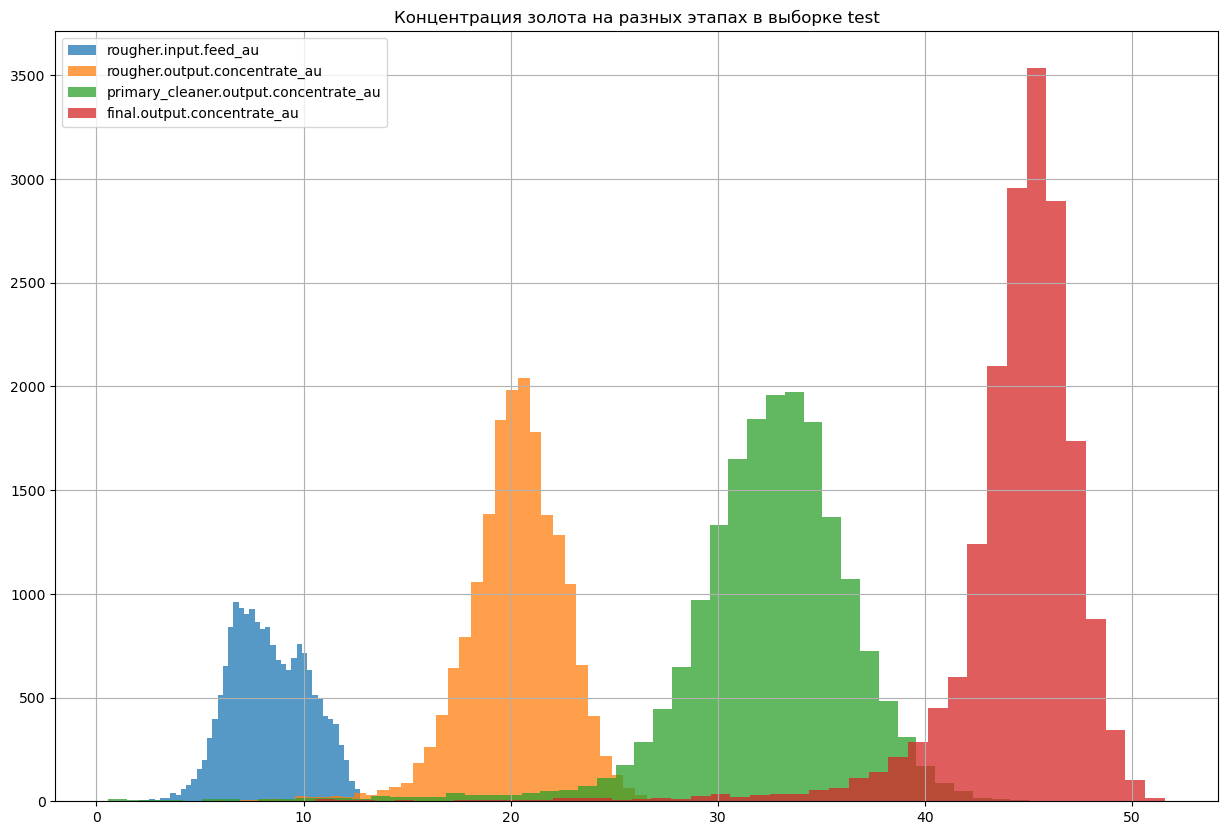

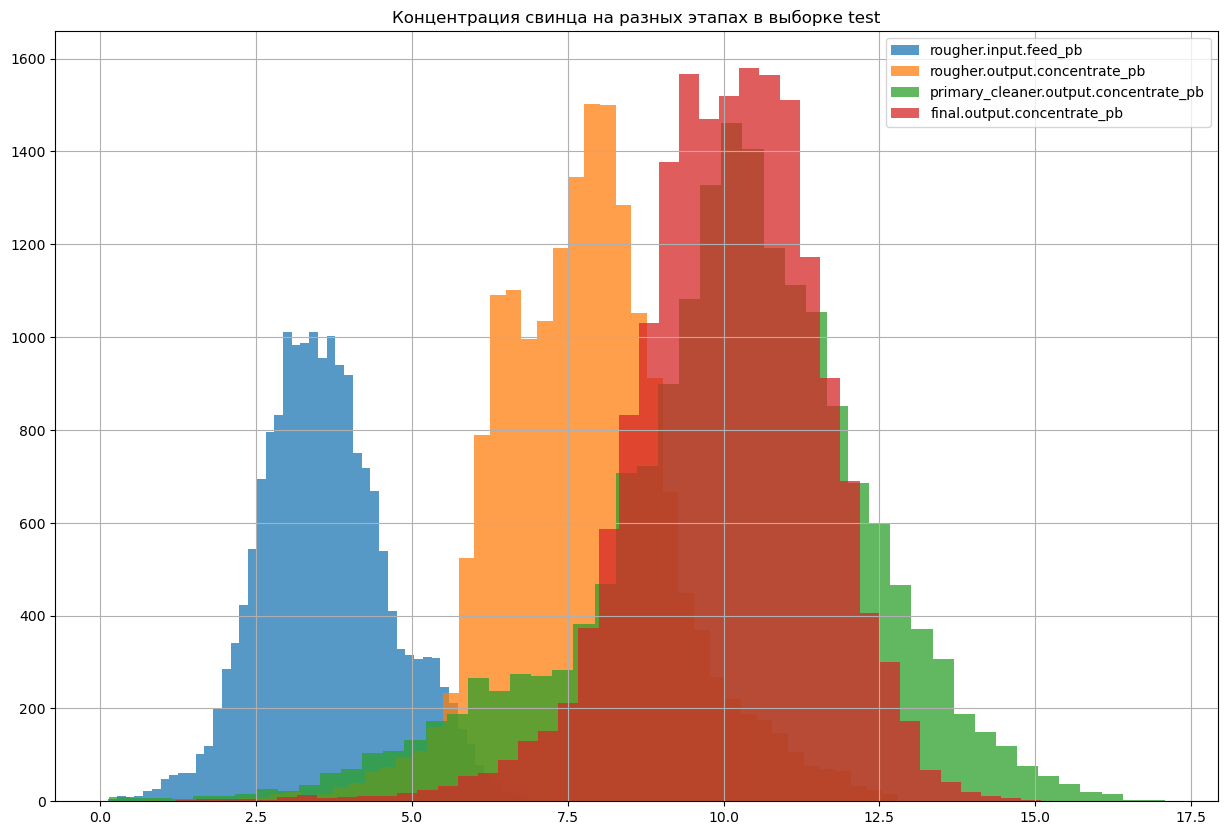

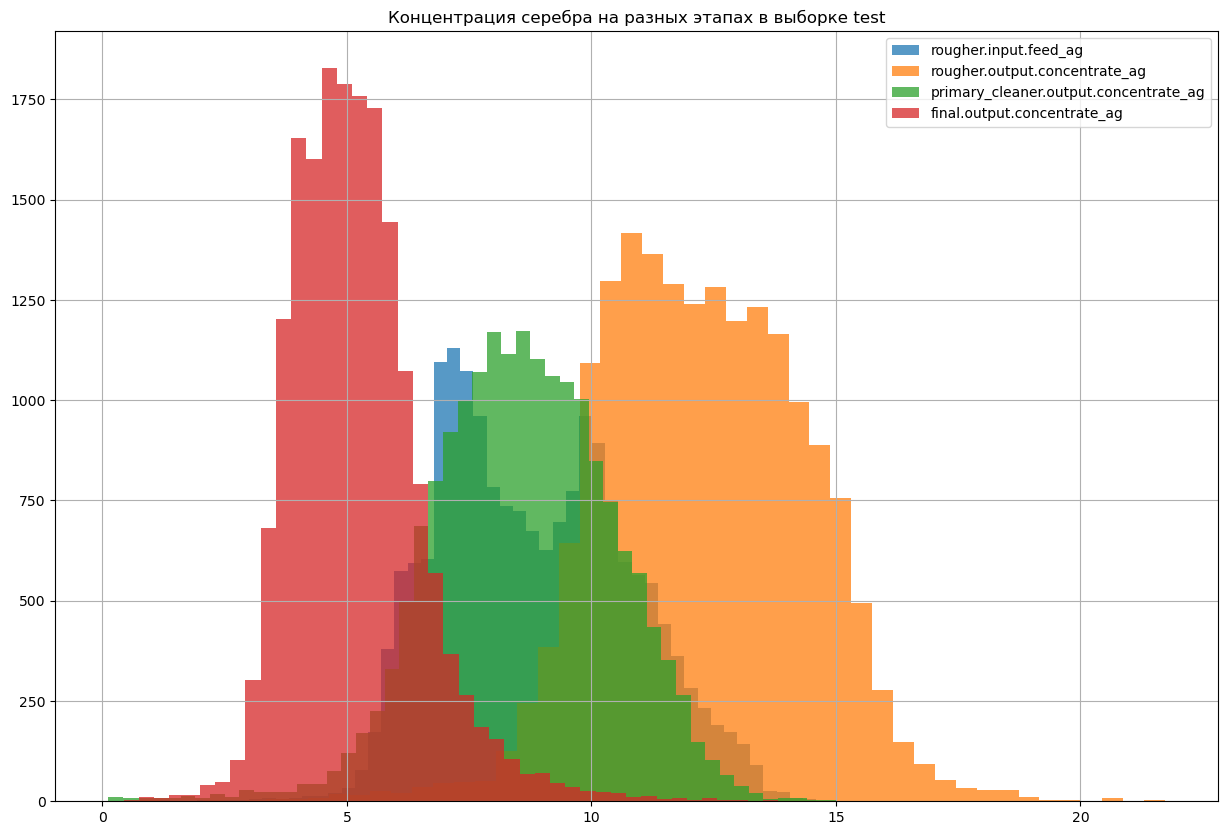

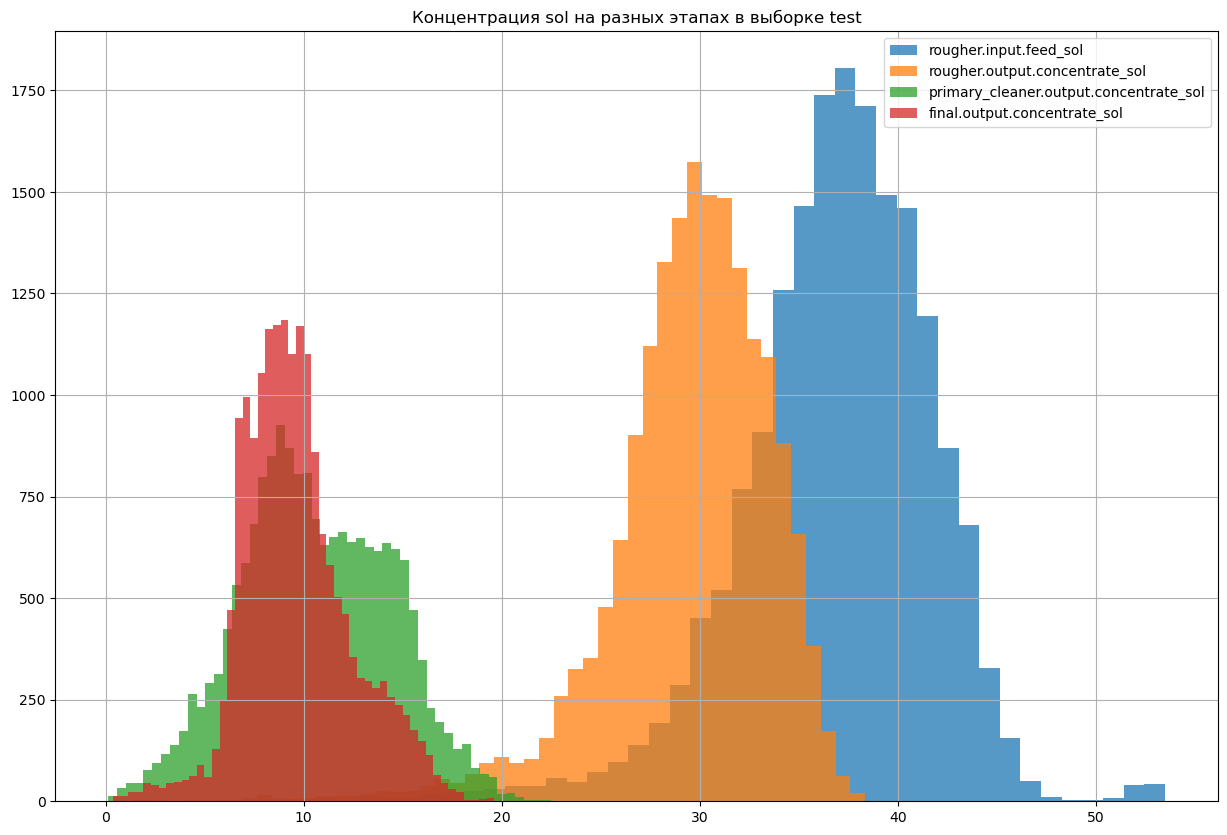

In [30]:
gold_recovery_full_new_shape_before = gold_recovery_full_new.shape[0]

gold_recovery_full_new = concentrates_emission_cleaner(gold_recovery_full_new, 0.1)

gold_recovery_full_new['rougher.input.feed_au'].hist(bins = 50, label = 'rougher.input.feed_au', alpha = 0.75, figsize = (15, 10))
gold_recovery_full_new['rougher.output.concentrate_au'].hist(bins = 50, label = 'rougher.output.concentrate_au', alpha = 0.75)
gold_recovery_full_new['primary_cleaner.output.concentrate_au'].hist(bins = 50, label = 'primary_cleaner.output.concentrate_au', alpha = 0.75)
gold_recovery_full_new['final.output.concentrate_au'].hist(bins = 50, label = 'final.output.concentrate_au', alpha = 0.75)
plt.legend()
plt.title('Концентрация золота на разных этапах в выборке test')
plt.show()

gold_recovery_full_new['rougher.input.feed_pb'].hist(bins = 50, label = 'rougher.input.feed_pb', alpha = 0.75, figsize = (15, 10))
gold_recovery_full_new['rougher.output.concentrate_pb'].hist(bins = 50, label = 'rougher.output.concentrate_pb', alpha = 0.75)
gold_recovery_full_new['primary_cleaner.output.concentrate_pb'].hist(bins = 50, label = 'primary_cleaner.output.concentrate_pb', alpha = 0.75)
gold_recovery_full_new['final.output.concentrate_pb'].hist(bins = 50, label = 'final.output.concentrate_pb', alpha = 0.75)
plt.legend()
plt.title('Концентрация свинца на разных этапах в выборке test')
plt.show()

gold_recovery_full_new['rougher.input.feed_ag'].hist(bins = 50, label = 'rougher.input.feed_ag', alpha = 0.75, figsize = (15, 10))
gold_recovery_full_new['rougher.output.concentrate_ag'].hist(bins = 50, label = 'rougher.output.concentrate_ag', alpha = 0.75)
gold_recovery_full_new['primary_cleaner.output.concentrate_ag'].hist(bins = 50, label = 'primary_cleaner.output.concentrate_ag', alpha = 0.75)
gold_recovery_full_new['final.output.concentrate_ag'].hist(bins = 50, label = 'final.output.concentrate_ag', alpha = 0.75)
plt.legend()
plt.title('Концентрация серебра на разных этапах в выборке test')
plt.show()

gold_recovery_full_new['rougher.input.feed_sol'].hist(bins = 50, label = 'rougher.input.feed_sol', alpha = 0.75, figsize = (15, 10))
gold_recovery_full_new['rougher.output.concentrate_sol'].hist(bins = 50, label = 'rougher.output.concentrate_sol', alpha = 0.75)
gold_recovery_full_new['primary_cleaner.output.concentrate_sol'].hist(bins = 50, label = 'primary_cleaner.output.concentrate_sol', alpha = 0.75)
gold_recovery_full_new['final.output.concentrate_sol'].hist(bins = 50, label = 'final.output.concentrate_sol', alpha = 0.75)
plt.legend()
plt.title('Концентрация sol на разных этапах в выборке test')
plt.show()

gold_recovery_full_new_shape_after = gold_recovery_full_new.shape[0]


In [31]:
print('Сохранено', gold_recovery_full_new_shape_after/gold_recovery_full_new_shape_before * 100, '% значений полного датасета')

Сохранено 93.00889963475487 % значений полного датасета


### Подготовка датасетов для обучения модели

In [32]:
features_train = gold_recovery_train_new[gold_recovery_test_new.columns].drop(columns = ['date', 'rougher.output.recovery', 'final.output.recovery'])
target_train = gold_recovery_train_new[['rougher.output.recovery', 'final.output.recovery']]
features_test = gold_recovery_test_new[gold_recovery_test_new.columns].drop(columns = ['date', 'rougher.output.recovery', 'final.output.recovery'])
target_test = gold_recovery_test_new[['rougher.output.recovery', 'final.output.recovery']]

print(features_train.info())
print(target_train.info())
print(features_test.info())
print(target_test.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13573 entries, 0 to 14148
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               13573 non-null  float64
 1   primary_cleaner.input.depressant            13573 non-null  float64
 2   primary_cleaner.input.feed_size             13573 non-null  float64
 3   primary_cleaner.input.xanthate              13573 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      13573 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    13573 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      13573 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    13573 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      13573 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    13573 non-null  float64
 10  primary_cl

### Промежуточный вывод

Распределение размера гранул на разных этапах довольно сходно. Распределения концентраций веществ на разных этапах обработки выглядят нормально, хоть и слегка скошено, есть выбросы около 0. 

Выбросы были удалены, сохранено более 90% датасета (удаление производилось по значению отсечки, чтобы удалить минимальное количество данных), подготовлены датасеты для обучения моделей.

## Расчет sMAPE

In [33]:
def sMAPE(target, predict):
    score = abs(target - predict)/((abs(target) + abs(predict)) * 0.5) * 100
    score = score.fillna(value = 0)
    score = np.mean(score)
    
    return score

In [34]:
def final_sMAPE(sMAPE_rougher, sMAPE_final):
    return 0.25 * sMAPE_rougher + 0.75 * sMAPE_final

In [35]:
sMAPE_scorer = make_scorer(sMAPE, greater_is_better = False)

## Модели предсказания

### Линейная регрессия

In [36]:
%%time
linear_regression_model = LinearRegression()

score_rougher = cross_val_score(linear_regression_model, 
                                features_train, 
                                target_train['rougher.output.recovery'], 
                                scoring = sMAPE_scorer, 
                                cv = 5)
print('sMAPE на этапе rougher:', np.mean(abs(score_rougher)))

sMAPE на этапе rougher: 7.1620271998882075
CPU times: user 301 ms, sys: 86.2 ms, total: 387 ms
Wall time: 74.4 ms


In [37]:
%%time
linear_regression_model = LinearRegression()

score_final = cross_val_score(linear_regression_model, 
                                features_train, 
                                target_train['final.output.recovery'], 
                                scoring = sMAPE_scorer, cv = 5)
print('sMAPE на этапе final:', np.mean(abs(score_final)))

sMAPE на этапе final: 10.962044194372016
CPU times: user 287 ms, sys: 72.3 ms, total: 359 ms
Wall time: 58.8 ms


In [38]:
print('sMAPE итоговое:', final_sMAPE(np.mean(abs(score_rougher)), np.mean(abs(score_final))))

sMAPE итоговое: 10.012039945751065


### Дерево решений

In [39]:
%%time
max_depths_sMAPE_scores = pd.DataFrame(columns = ['max_depth', 'sMAPE_rougher', 'sMAPE_final', 'sMAPE']) 

for max_depth in range(1, 30, 2):
    decision_tree_model = DecisionTreeRegressor(max_depth = max_depth, random_state = 12345)

    score_rougher = cross_val_score(decision_tree_model,
                                    features_train, 
                                    target_train['rougher.output.recovery'], 
                                    scoring = sMAPE_scorer, 
                                    cv = 5)

    score_final = cross_val_score(decision_tree_model,
                                  features_train, 
                                  target_train['final.output.recovery'], 
                                  scoring = sMAPE_scorer, 
                                  cv = 5)    
    
    scores_new_row = pd.Series(data = {'max_depth' : max_depth, 
                                       'sMAPE_rougher' : np.mean(abs(score_rougher)), 
                                       'sMAPE_final' : np.mean(abs(score_final)), 
                                       'sMAPE' : final_sMAPE(np.mean(abs(score_rougher)), np.mean(abs(score_final)))})
    
    max_depths_sMAPE_scores = pd.concat([max_depths_sMAPE_scores, scores_new_row.to_frame().T], ignore_index = True)
    
best_score = max_depths_sMAPE_scores[max_depths_sMAPE_scores['sMAPE'] == max_depths_sMAPE_scores['sMAPE'].min()].reset_index(drop = True)

display(max_depths_sMAPE_scores.sort_values('sMAPE', ascending = True).head())
display('Наилучшие гиперпараметры и значения sMAPE:', best_score)

,max_depth,sMAPE_rougher,sMAPE_final,sMAPE
1,3.0,6.795681,9.451880,8.787830
0,1.0,7.382435,9.635244,9.072042
2,5.0,7.163836,10.685683,9.805221
3,7.0,7.545744,11.758172,10.705065
4,9.0,8.125868,13.442964,12.113690


'Наилучшие гиперпараметры и значения sMAPE:'

,max_depth,sMAPE_rougher,sMAPE_final,sMAPE
0,3.0,6.795681,9.45188,8.78783


CPU times: user 1min 7s, sys: 765 ms, total: 1min 8s
Wall time: 1min 7s


### Случайный лес

In [40]:
%%time
max_depths_sMAPE_scores = pd.DataFrame(columns = ['max_depth', 'min_samples_split', 'sMAPE_rougher', 'sMAPE_final', 'sMAPE']) 

for max_depth in range(2, 8, 3):
    for min_samples_split in range(2, 8, 3):
        random_forest_model = RandomForestRegressor(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 12345)

        score_rougher = cross_val_score(random_forest_model,
                                        features_train, 
                                        target_train['rougher.output.recovery'], 
                                        scoring = sMAPE_scorer, 
                                        cv = 5)

        score_final = cross_val_score(random_forest_model,
                                      features_train, 
                                      target_train['final.output.recovery'], 
                                      scoring = sMAPE_scorer, 
                                      cv = 5)    

        scores_new_row = pd.Series(data = {'max_depth' : max_depth, 
                                           'min_samples_split' :  min_samples_split,
                                           'sMAPE_rougher' : np.mean(abs(score_rougher)), 
                                           'sMAPE_final' : np.mean(abs(score_final)), 
                                           'sMAPE' : final_sMAPE(np.mean(abs(score_rougher)), np.mean(abs(score_final)))})

        max_depths_sMAPE_scores = pd.concat([max_depths_sMAPE_scores, scores_new_row.to_frame().T], ignore_index = True)
    
best_score = max_depths_sMAPE_scores[max_depths_sMAPE_scores['sMAPE'] == max_depths_sMAPE_scores['sMAPE'].min()].reset_index(drop = True)

display(max_depths_sMAPE_scores.sort_values('sMAPE', ascending = True).head())
display('Наилучшие гиперпараметры и значения sMAPE:', best_score)

,max_depth,min_samples_split,sMAPE_rougher,sMAPE_final,sMAPE
2,5.0,2.0,6.354298,9.016466,8.350924
3,5.0,5.0,6.349085,9.046371,8.372049
0,2.0,2.0,7.007452,9.069898,8.554286
1,2.0,5.0,7.007452,9.069898,8.554286


'Наилучшие гиперпараметры и значения sMAPE:'

,max_depth,min_samples_split,sMAPE_rougher,sMAPE_final,sMAPE
0,5.0,2.0,6.354298,9.016466,8.350924


CPU times: user 6min 2s, sys: 2.7 s, total: 6min 5s
Wall time: 6min 6s


### Применение наилучшей модели к тестовой выборке

In [41]:
%%time
best_model = RandomForestRegressor(max_depth = 5, min_samples_split = 2, random_state = 12345)
best_model.fit(features_train, target_train['rougher.output.recovery'])
predictions_rougher = best_model.predict(features_test)

best_model = RandomForestRegressor(max_depth = 5, min_samples_split = 2, random_state = 12345)
best_model.fit(features_train, target_train['final.output.recovery'])
predictions_final = best_model.predict(features_test)

print('sMAPE итоговое для наилучшей модели:', 
      final_sMAPE(sMAPE(target_test['rougher.output.recovery'], predictions_rougher), 
                  sMAPE(target_test['final.output.recovery'], predictions_final)))

sMAPE итоговое для наилучшей модели: 9.393818636985651
CPU times: user 32 s, sys: 237 ms, total: 32.3 s
Wall time: 32.4 s


### Проверка на адекватность

In [42]:
dummy_model = DummyRegressor(strategy = 'mean')
dummy_model.fit(features_train, target_train['rougher.output.recovery'])
dummy_predictions_rougher = dummy_model.predict(features_test)

dummy_model = DummyRegressor(strategy = 'mean')
dummy_model.fit(features_train, target_train['final.output.recovery'])
dummy_predictions_final = dummy_model.predict(features_test)

print('sMAPE итоговое для константной модели:', 
      final_sMAPE(sMAPE(target_test['rougher.output.recovery'], dummy_predictions_rougher), 
                  sMAPE(target_test['final.output.recovery'], dummy_predictions_final)))

sMAPE итоговое для константной модели: 9.826695658678567


### Промежуточный вывод

Рассмотрены модели линейной регрессии, решающего дерева и случайного леса. Наилучшие показатели дает модель случайного леса с показателем итоговой sMAPE: 8.350 гиперпараметры: max_depth = 5, mmin_samples_split = 2.

Наилучшие модели по типам:

|  |Линейнаая регрессия|Решающее дерево|Случайный лес| 
|:-|:-------------:|:-----------:|:---------------------:|
|sMAPE_rougher|7.162|6.796|6.354|
|sMAPE_final|10.962|9.452|9.016|
|Итоговое sMAPE|10.012|8.788|**8.350**|

Произведена проверка на адеватность посредством сравнения с константной моделью. Итоговое sMAPE константной модели: 9.827, что больше, а значит хуже, чем у моделей машинного обучения.

При проверке наилучшей модели на тестовой выборке, итоговое sMAPE составило 9.394.

## Выводы

В процессе работы были произведены следующие действия:
- открыты файлы, сформированы датафреймы;
- построены гистограммы данных полного датасета;
- выяснено, какие колонки отсутствуют в тестовом датасете;
- произведена проверка расчета эффективности обогащения (MAE = 1.113e-14);
- обработаны пропуски данных (заполнены ближайшими значениями по дате);
- данные проверены на наличие дубликатов;
- изменены типы данных в колонках date;
- изучено распределение размеров гранул по этапам;
- изучено распределение концентраций веществ (непосредственно и суммарно) по этапам;
- обнаружены и обработаны выбросы значений в концентрациях веществ по этапам;
- данные подготовлены к обучению моделей;
- обучены модели линейной регрессии, решающего дерева (с разными гиперпараметрами), случайного леса (с разными гиперпараметрами);
- дла всех моделей проведена кросс-валидация;
- выделена лучшая модель;
- с помощью наилучшей модели сделаны предсказания для тестовой выборки и посчитано sMAPE предсказаний;
- произведена проверка моделей на адекватность.

Наилучшей моделью по показателю значения итогового sMAPE стала модель случайного леса с гиперпараметрами: max_depth = 5, mmin_samples_split = 2. Показатель **итогового sMAPE у модели: 8.350**. Это меньше чем итоговое sMAPE константной модели: 9.827. Модель адекватна.

Наилучшая модель показала **итоговое sMAPE = 9.394** на тестовой выборке, что **меньше чем у константной модели**, даже на тестовой выборке модель адекватна.